<a href="https://colab.research.google.com/github/raunakkbanerjee/NLP-assignment/blob/main/CS565_Assignment1_180121032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Please run the cells in order to avoid errors or faulty outputs

In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/96opp4trrc9yguo/en_wiki.txt?dl=0' -O en_wiki.txt
!wget --no-check-certificate 'https://www.dropbox.com/s/i1d4mpdbzg6w1u4/hi_wiki.txt?dl=0' -O hi_wiki.txt

--2021-09-19 23:00:48--  https://www.dropbox.com/s/96opp4trrc9yguo/en_wiki.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/96opp4trrc9yguo/en_wiki.txt [following]
--2021-09-19 23:00:48--  https://www.dropbox.com/s/raw/96opp4trrc9yguo/en_wiki.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc949573482307775c70792d744a.dl.dropboxusercontent.com/cd/0/inline/BWfTyZXgK40XDxUMlNhdBDq45guk5qgnLDIAI1LKBm1OsOAPQOfCYz9kkoBwFgOLlr2woC3tGuMAMbl8PwMBjOfEtqqC5wQL4Pklk_PL-HW500OKdtSiRiKuq20MbCbGQ282JvSUhKgniIHa23iP7TpQ/file# [following]
--2021-09-19 23:00:48--  https://uc949573482307775c70792d744a.dl.dropboxusercontent.com/cd/0/inline/BWfTyZXgK40XDxUMlNhdBDq45guk5qgnLDIAI1LKBm1OsOAPQOfCYz9kkoBwFgOLlr2woC3tGuMAMbl8PwMBjOfE

Importing Libraries

In [ ]:
from io import open
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U spacy
sns.set()
import spacy
spacy.__version__
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 64 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#English

##Q 1.3.1)

In [ ]:
f = open('en_wiki.txt', 'r')
en_wiki = f.read()
f.close()
en_wiki = en_wiki[:100094] #Due to session crashes, I considering only a part of the corpus, first 743 sentences to be precise.

###1)a) Sentence segmentation and word tokenization using NLTK

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = sent_tokenize(en_wiki) #Sentence segmentation
for sentence in sentences:
  print(sentence)

The word "atom" was coined by ancient Greek philosophers.
However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.
As a result, their views on what atoms look like and how they behave were incorrect.
They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.
It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.
In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).
For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).
This means that 100g of tin will combine either with 13.5g or 27g of oxygen.
13.5 and

In [ ]:
tokens = word_tokenize(en_wiki) #word tokenization
print(tokens) #Even fullstops, commas and brackets are tokenized

['The', 'word', '``', 'atom', "''", 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers', '.', 'However', ',', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical', 'and', 'theological', 'reasoning', 'rather', 'than', 'evidence', 'and', 'experimentation', '.', 'As', 'a', 'result', ',', 'their', 'views', 'on', 'what', 'atoms', 'look', 'like', 'and', 'how', 'they', 'behave', 'were', 'incorrect', '.', 'They', 'also', 'could', 'not', 'convince', 'everybody', ',', 'so', 'atomism', 'was', 'but', 'one', 'of', 'a', 'number', 'of', 'competing', 'theories', 'on', 'the', 'nature', 'of', 'matter', '.', 'It', 'was', 'not', 'until', 'the', '19th', 'century', 'that', 'the', 'idea', 'was', 'embraced', 'and', 'refined', 'by', 'scientists', ',', 'when', 'the', 'blossoming', 'science', 'of', 'chemistry', 'produced', 'discoveries', 'that', 'only', 'the', 'concept', 'of', 'atoms', 'could', 'explain', '.', 'In', 'the', 'early', '1800s', ',', 'John', 'Dalton', 'used', 'the', 'concept', 'of', 'atom

In [ ]:
words_1 = [word for word in tokens if word.isalnum()]#Removing brackets, commas and other punctuation

print(words_1)

['The', 'word', 'atom', 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers', 'However', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical', 'and', 'theological', 'reasoning', 'rather', 'than', 'evidence', 'and', 'experimentation', 'As', 'a', 'result', 'their', 'views', 'on', 'what', 'atoms', 'look', 'like', 'and', 'how', 'they', 'behave', 'were', 'incorrect', 'They', 'also', 'could', 'not', 'convince', 'everybody', 'so', 'atomism', 'was', 'but', 'one', 'of', 'a', 'number', 'of', 'competing', 'theories', 'on', 'the', 'nature', 'of', 'matter', 'It', 'was', 'not', 'until', 'the', '19th', 'century', 'that', 'the', 'idea', 'was', 'embraced', 'and', 'refined', 'by', 'scientists', 'when', 'the', 'blossoming', 'science', 'of', 'chemistry', 'produced', 'discoveries', 'that', 'only', 'the', 'concept', 'of', 'atoms', 'could', 'explain', 'In', 'the', 'early', '1800s', 'John', 'Dalton', 'used', 'the', 'concept', 'of', 'atoms', 'to', 'explain', 'why', 'elements', 'always', 'react', 'in

###b) using SpaCy

In [ ]:
# Import the English language class
import spacy

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm") #Loading the training pipeline module
doc = nlp(en_wiki)

In [ ]:
for sent in doc.sents: #Sentence segmentation
    print(sent.text)

The word "atom" was coined by ancient Greek philosophers.
However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.
As a result, their views on what atoms look like and how they behave were incorrect.
They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.
It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.



In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).
For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).
This means that 100g of tin will combine either with 13.5g or 27g of oxygen.
13.5 

In [ ]:
#Word tokenization 
words_2 = [token for token in doc if token.text.isalnum()] #Retaining only alpha numeric characters ie. removing brackets, commas etc. 

print(words_2)

[The, word, atom, was, coined, by, ancient, Greek, philosophers, However, these, ideas, were, founded, in, philosophical, and, theological, reasoning, rather, than, evidence, and, experimentation, As, a, result, their, views, on, what, atoms, look, like, and, how, they, behave, were, incorrect, They, also, could, not, convince, everybody, so, atomism, was, but, one, of, a, number, of, competing, theories, on, the, nature, of, matter, It, was, not, until, the, 19th, century, that, the, idea, was, embraced, and, refined, by, scientists, when, the, blossoming, science, of, chemistry, produced, discoveries, that, only, the, concept, of, atoms, could, explain, In, the, early, 1800s, John, Dalton, used, the, concept, of, atoms, to, explain, why, elements, always, react, in, ratios, of, small, whole, numbers, the, law, of, multiple, proportions, For, instance, there, are, two, types, of, tin, oxide, one, is, tin, and, oxygen, and, the, other, is, tin, and, oxygen, oxide, and, tin, dioxide, re

###2)Find all possible unigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(en_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

unigrams = [item for item in ngrams(words_1, 1)]
print(unigrams)

[('the',), ('word',), ('atom',), ('was',), ('coined',), ('by',), ('ancient',), ('greek',), ('philosophers',), ('however',), ('these',), ('ideas',), ('were',), ('founded',), ('in',), ('philosophical',), ('and',), ('theological',), ('reasoning',), ('rather',), ('than',), ('evidence',), ('and',), ('experimentation',), ('as',), ('a',), ('result',), ('their',), ('views',), ('on',), ('what',), ('atoms',), ('look',), ('like',), ('and',), ('how',), ('they',), ('behave',), ('were',), ('incorrect',), ('they',), ('also',), ('could',), ('not',), ('convince',), ('everybody',), ('so',), ('atomism',), ('was',), ('but',), ('one',), ('of',), ('a',), ('number',), ('of',), ('competing',), ('theories',), ('on',), ('the',), ('nature',), ('of',), ('matter',), ('it',), ('was',), ('not',), ('until',), ('the',), ('19th',), ('century',), ('that',), ('the',), ('idea',), ('was',), ('embraced',), ('and',), ('refined',), ('by',), ('scientists',), ('when',), ('the',), ('blossoming',), ('science',), ('of',), ('chemis

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(words_1).most_common()) #frequency in order of most to least common

In [ ]:
words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

In [ ]:
print(words[-3])

developing


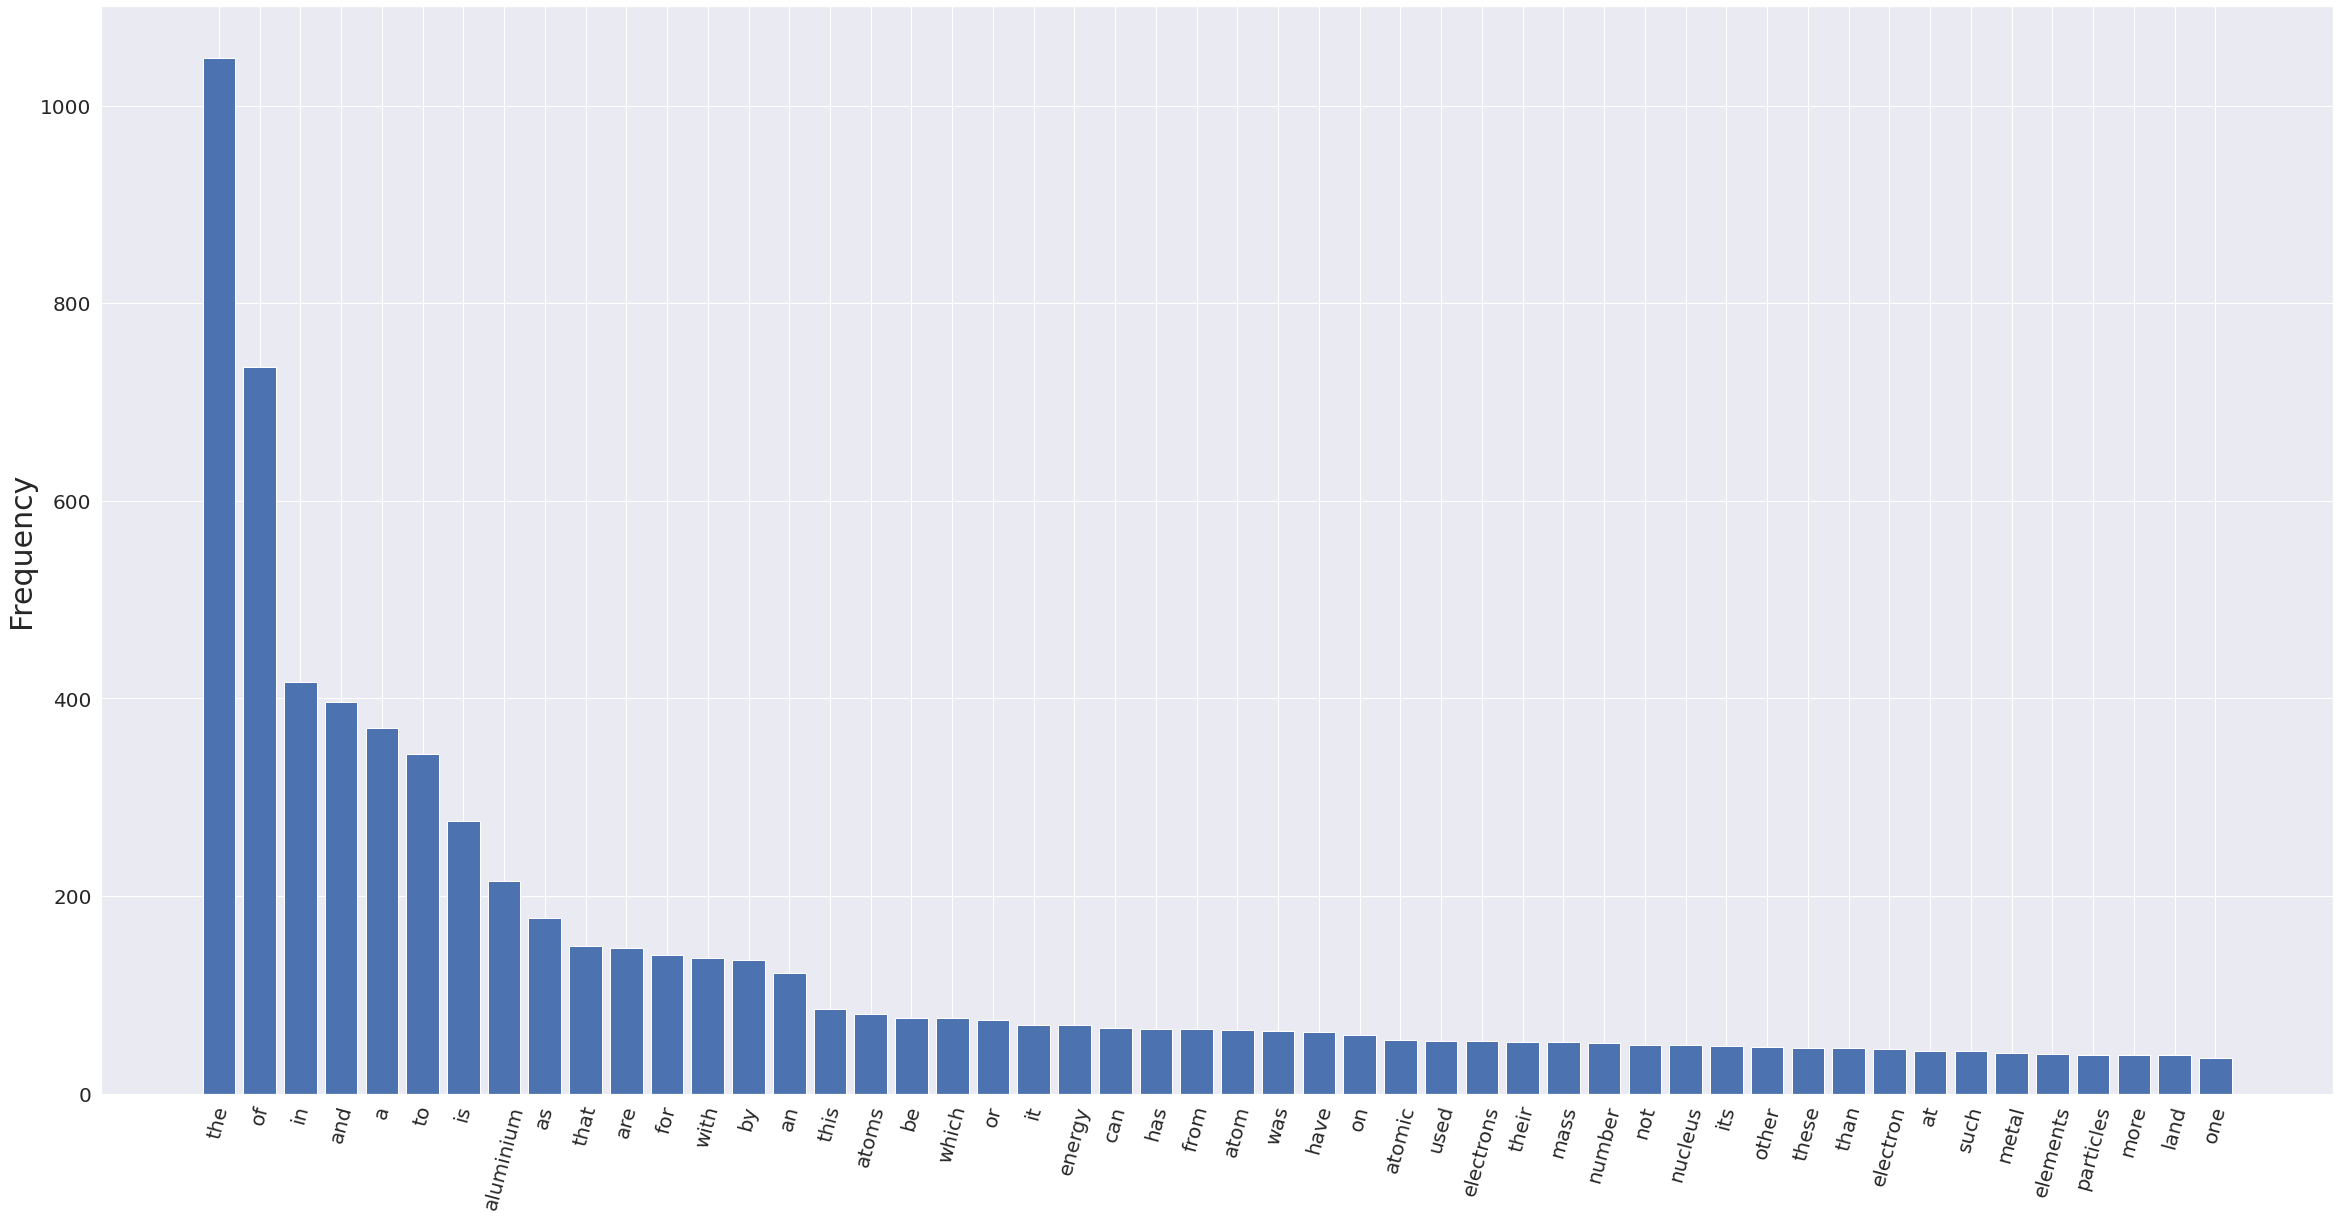

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(words[:50], frequency[:50]) #Plotting the 50 most common unigrams
plt.show()

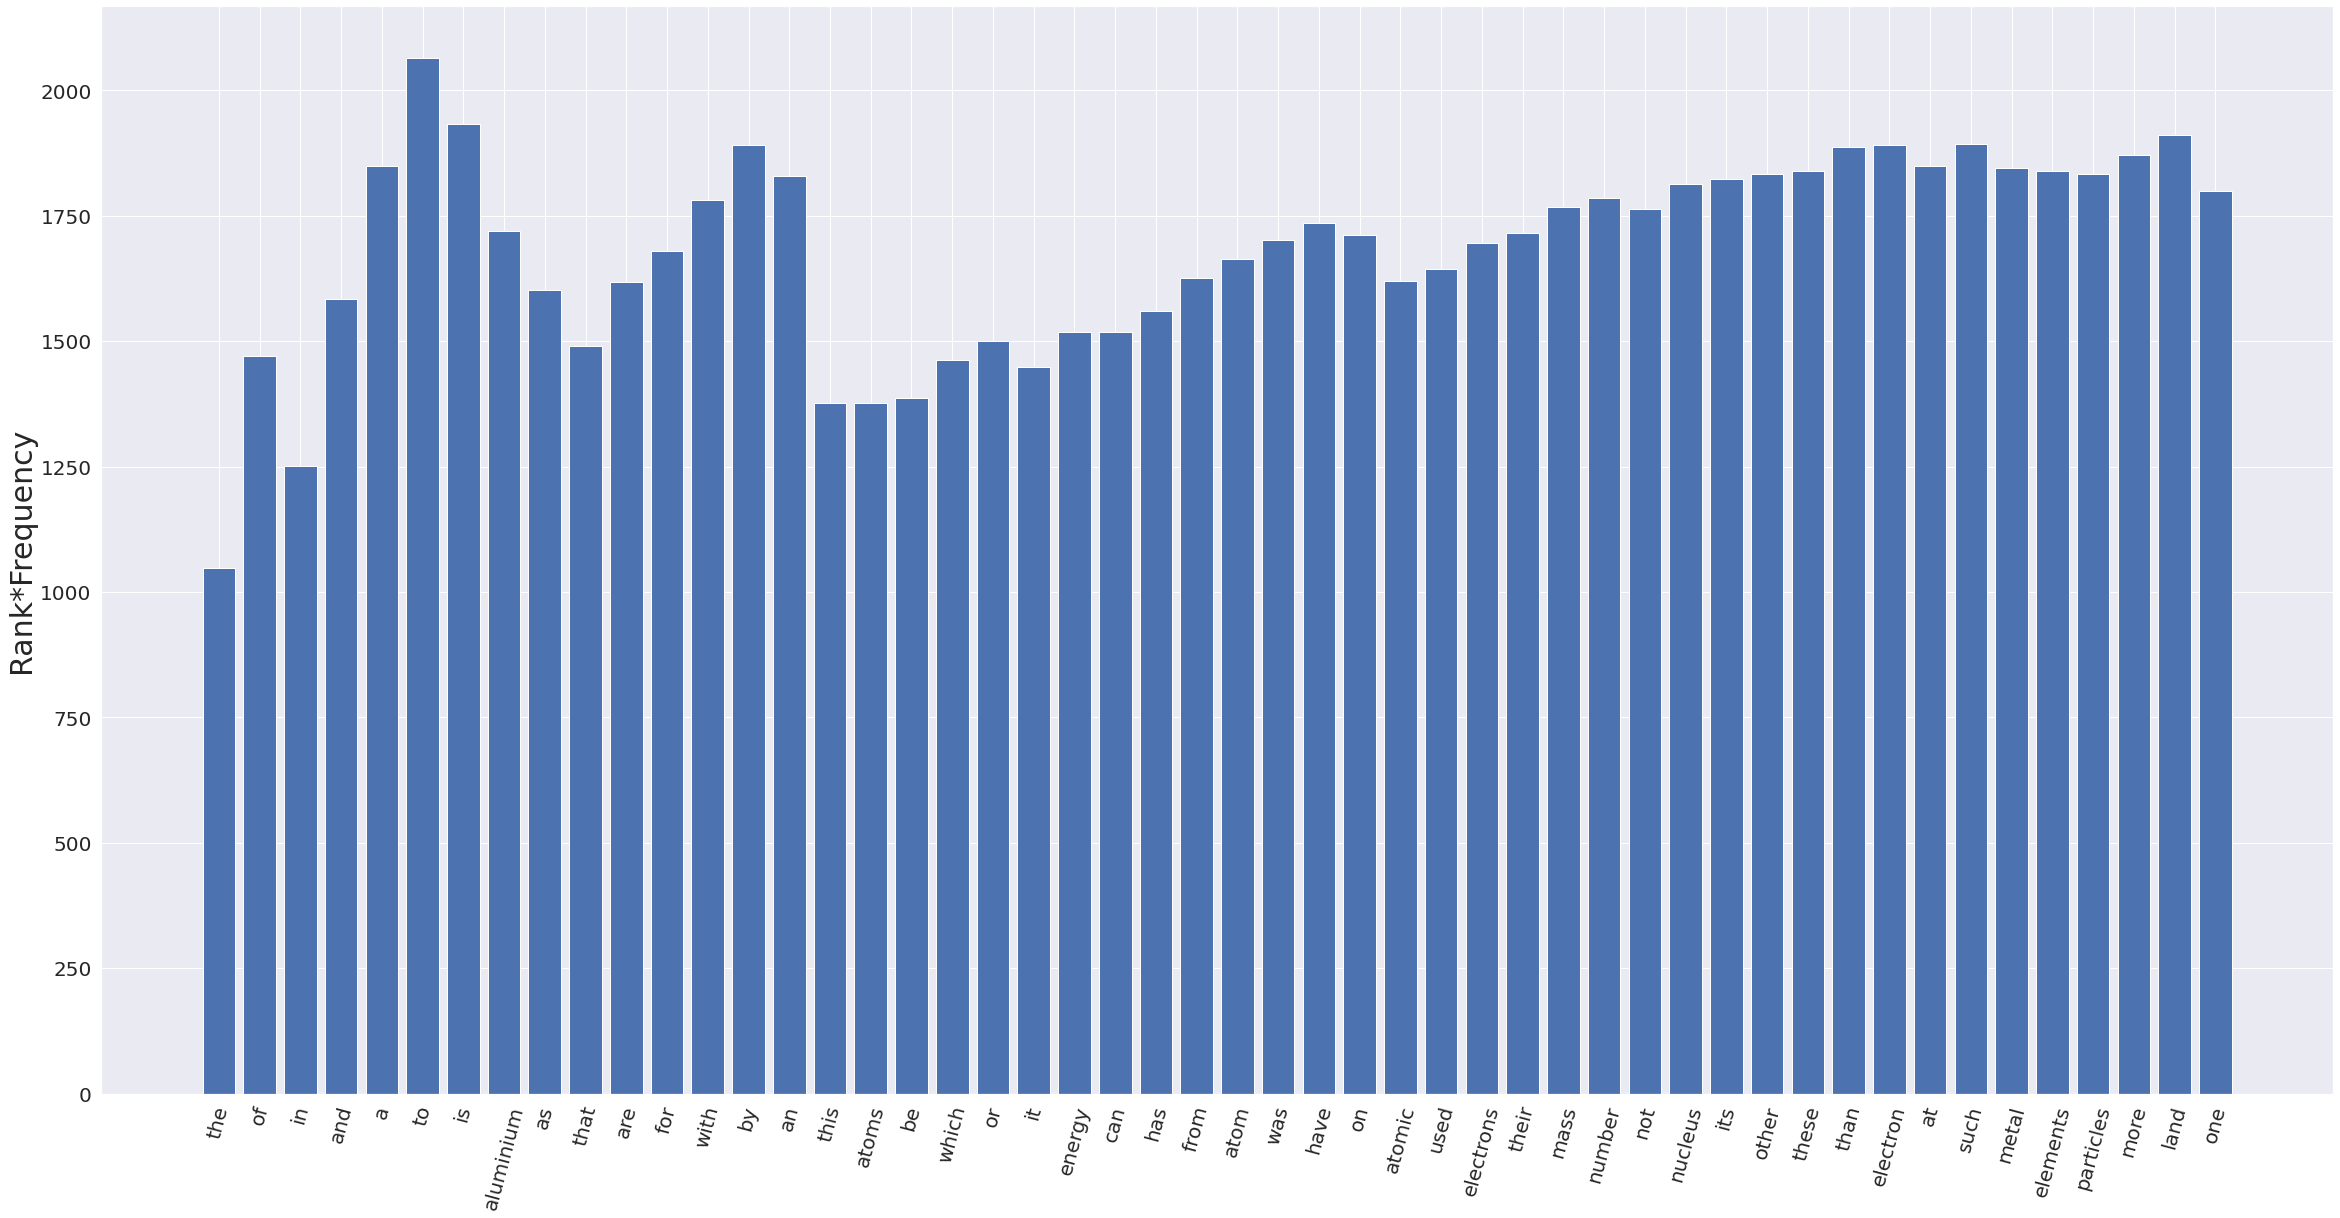

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(words[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 unigrams
plt.show()

###3)Find all possible bigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(en_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

bigrams = [item for item in ngrams(words_1, 2)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_bigrams = [sorted_bigrams[i][0]+ " " + sorted_bigrams[i][1] for i in range(len(sorted_bigrams))]
print(merged_bigrams[:50])

['of the', 'in the', 'to the', 'as a', 'and the', 'of aluminium', 'such as', 'of a', 'number of', 'the nucleus', 'it is', 'by the', 'aluminium is', 'with the', 'can be', 'to be', 'in a', 'on the', 'the same', 'is a', 'an atom', 'is the', 'as the', 'advanced chemistry', 'the atom', 'of an', 'from the', 'hip hop', 'mass of', 'of atoms', 'for example', 'of these', 'at the', 'in an', 'with a', 'the electron', 'the mass', 'for the', 'the earth', 'the metal', 'known as', 'which is', 'production of', 'aluminium in', 'the atomic', 'protons and', 'the most', 'has a', 'and in', 'arable land']


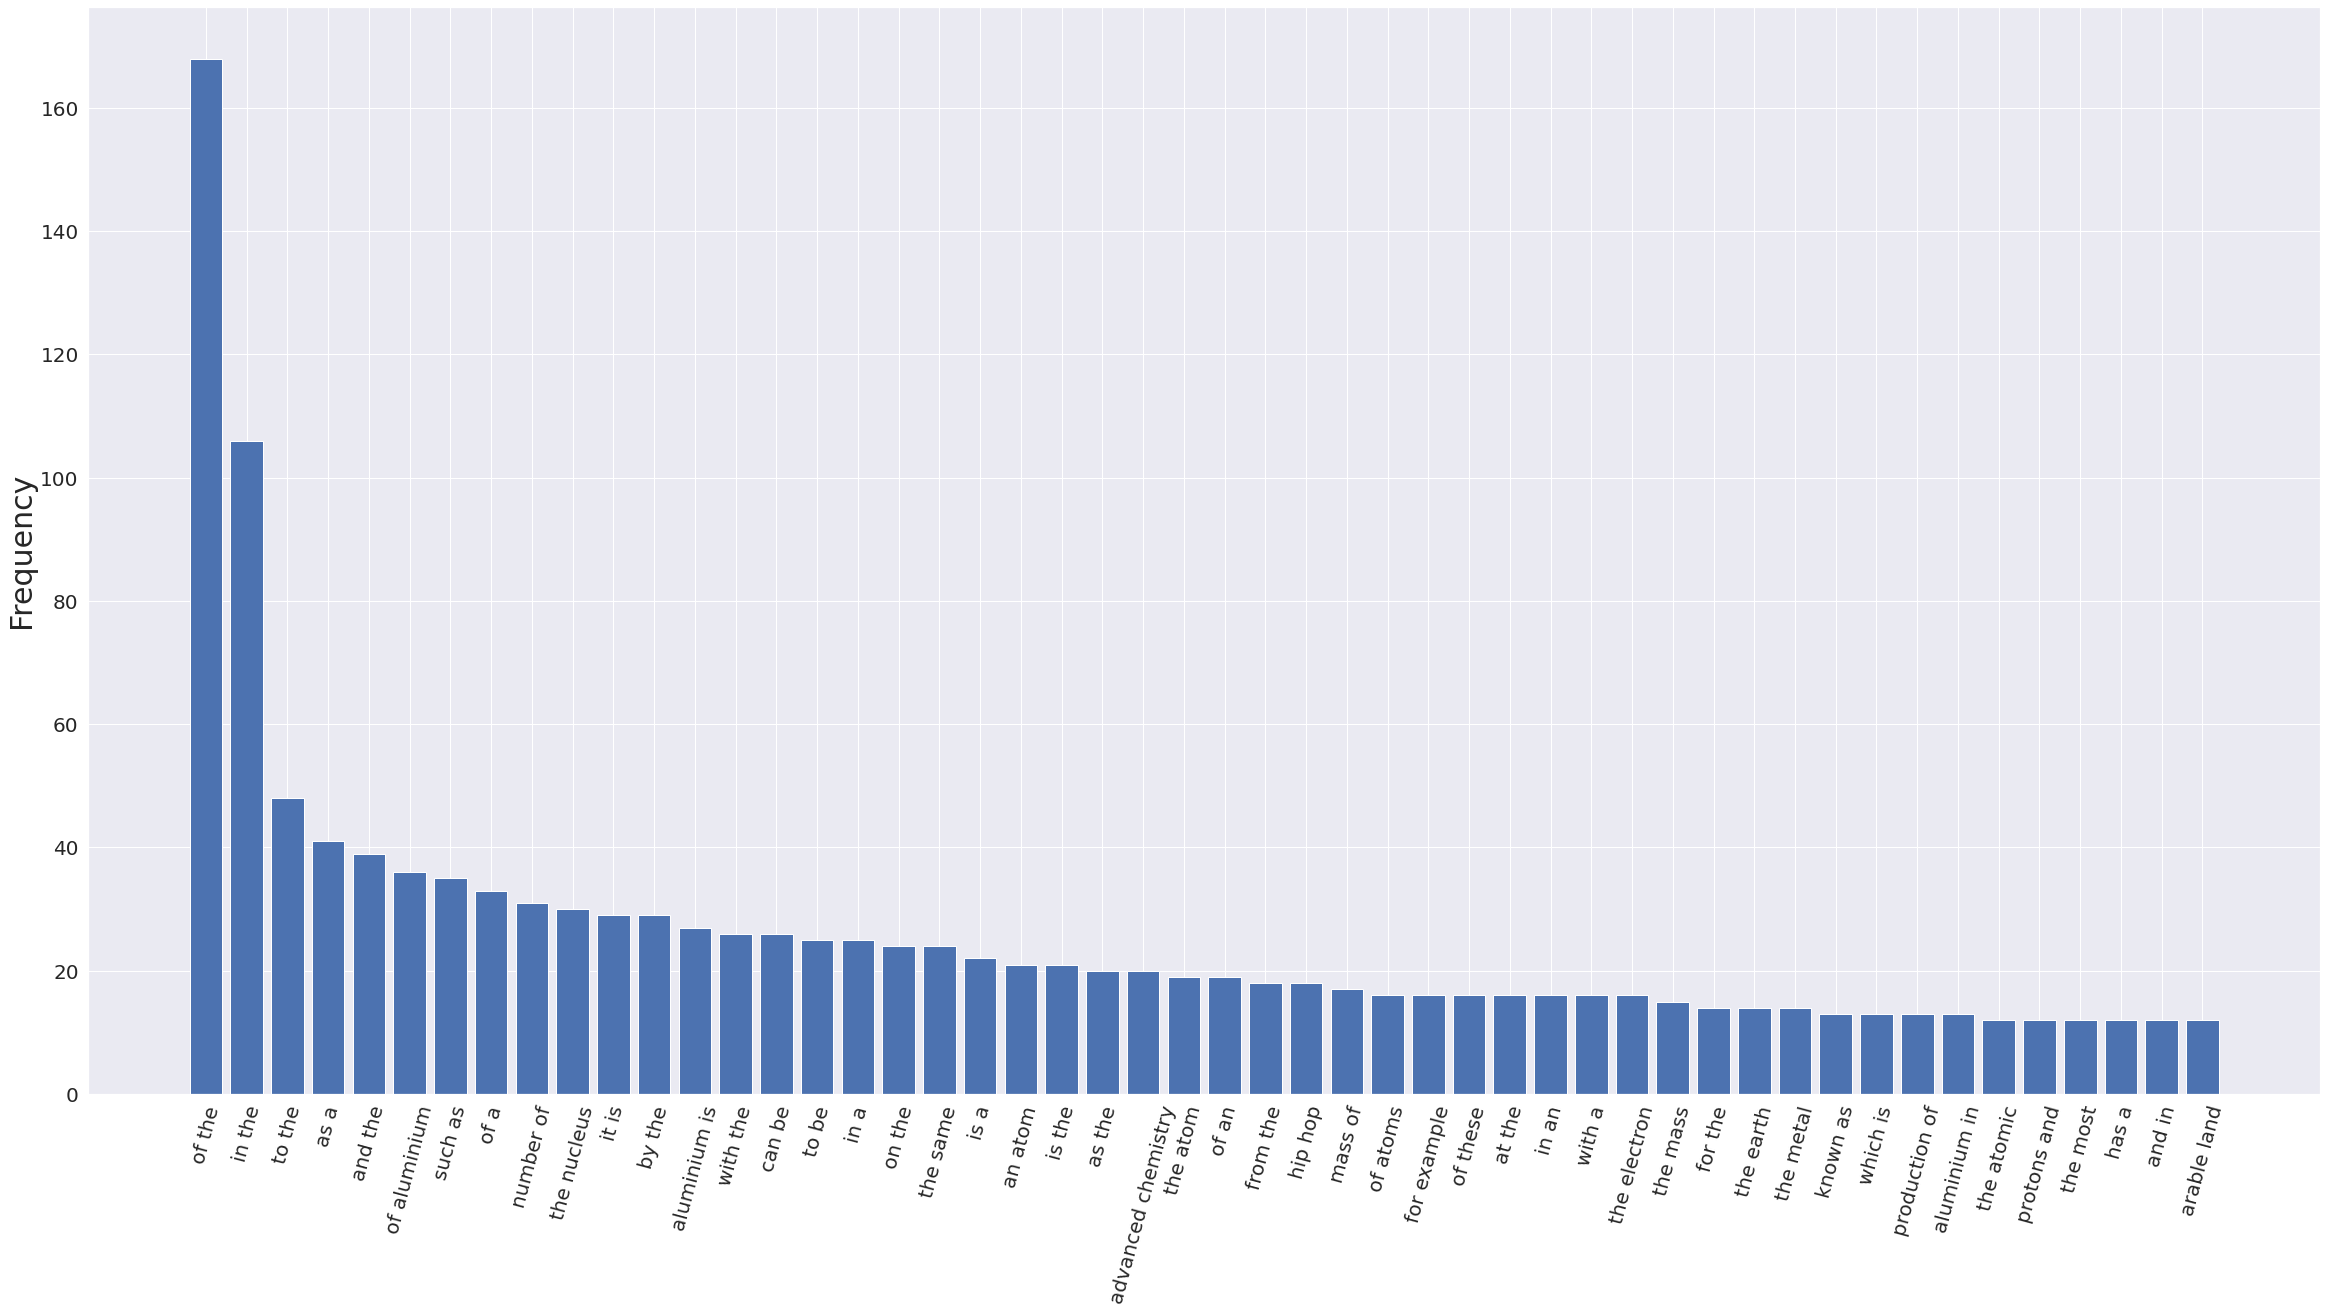

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(merged_bigrams[:50], frequency[:50]) #plotting the 50 bigrams
plt.show()

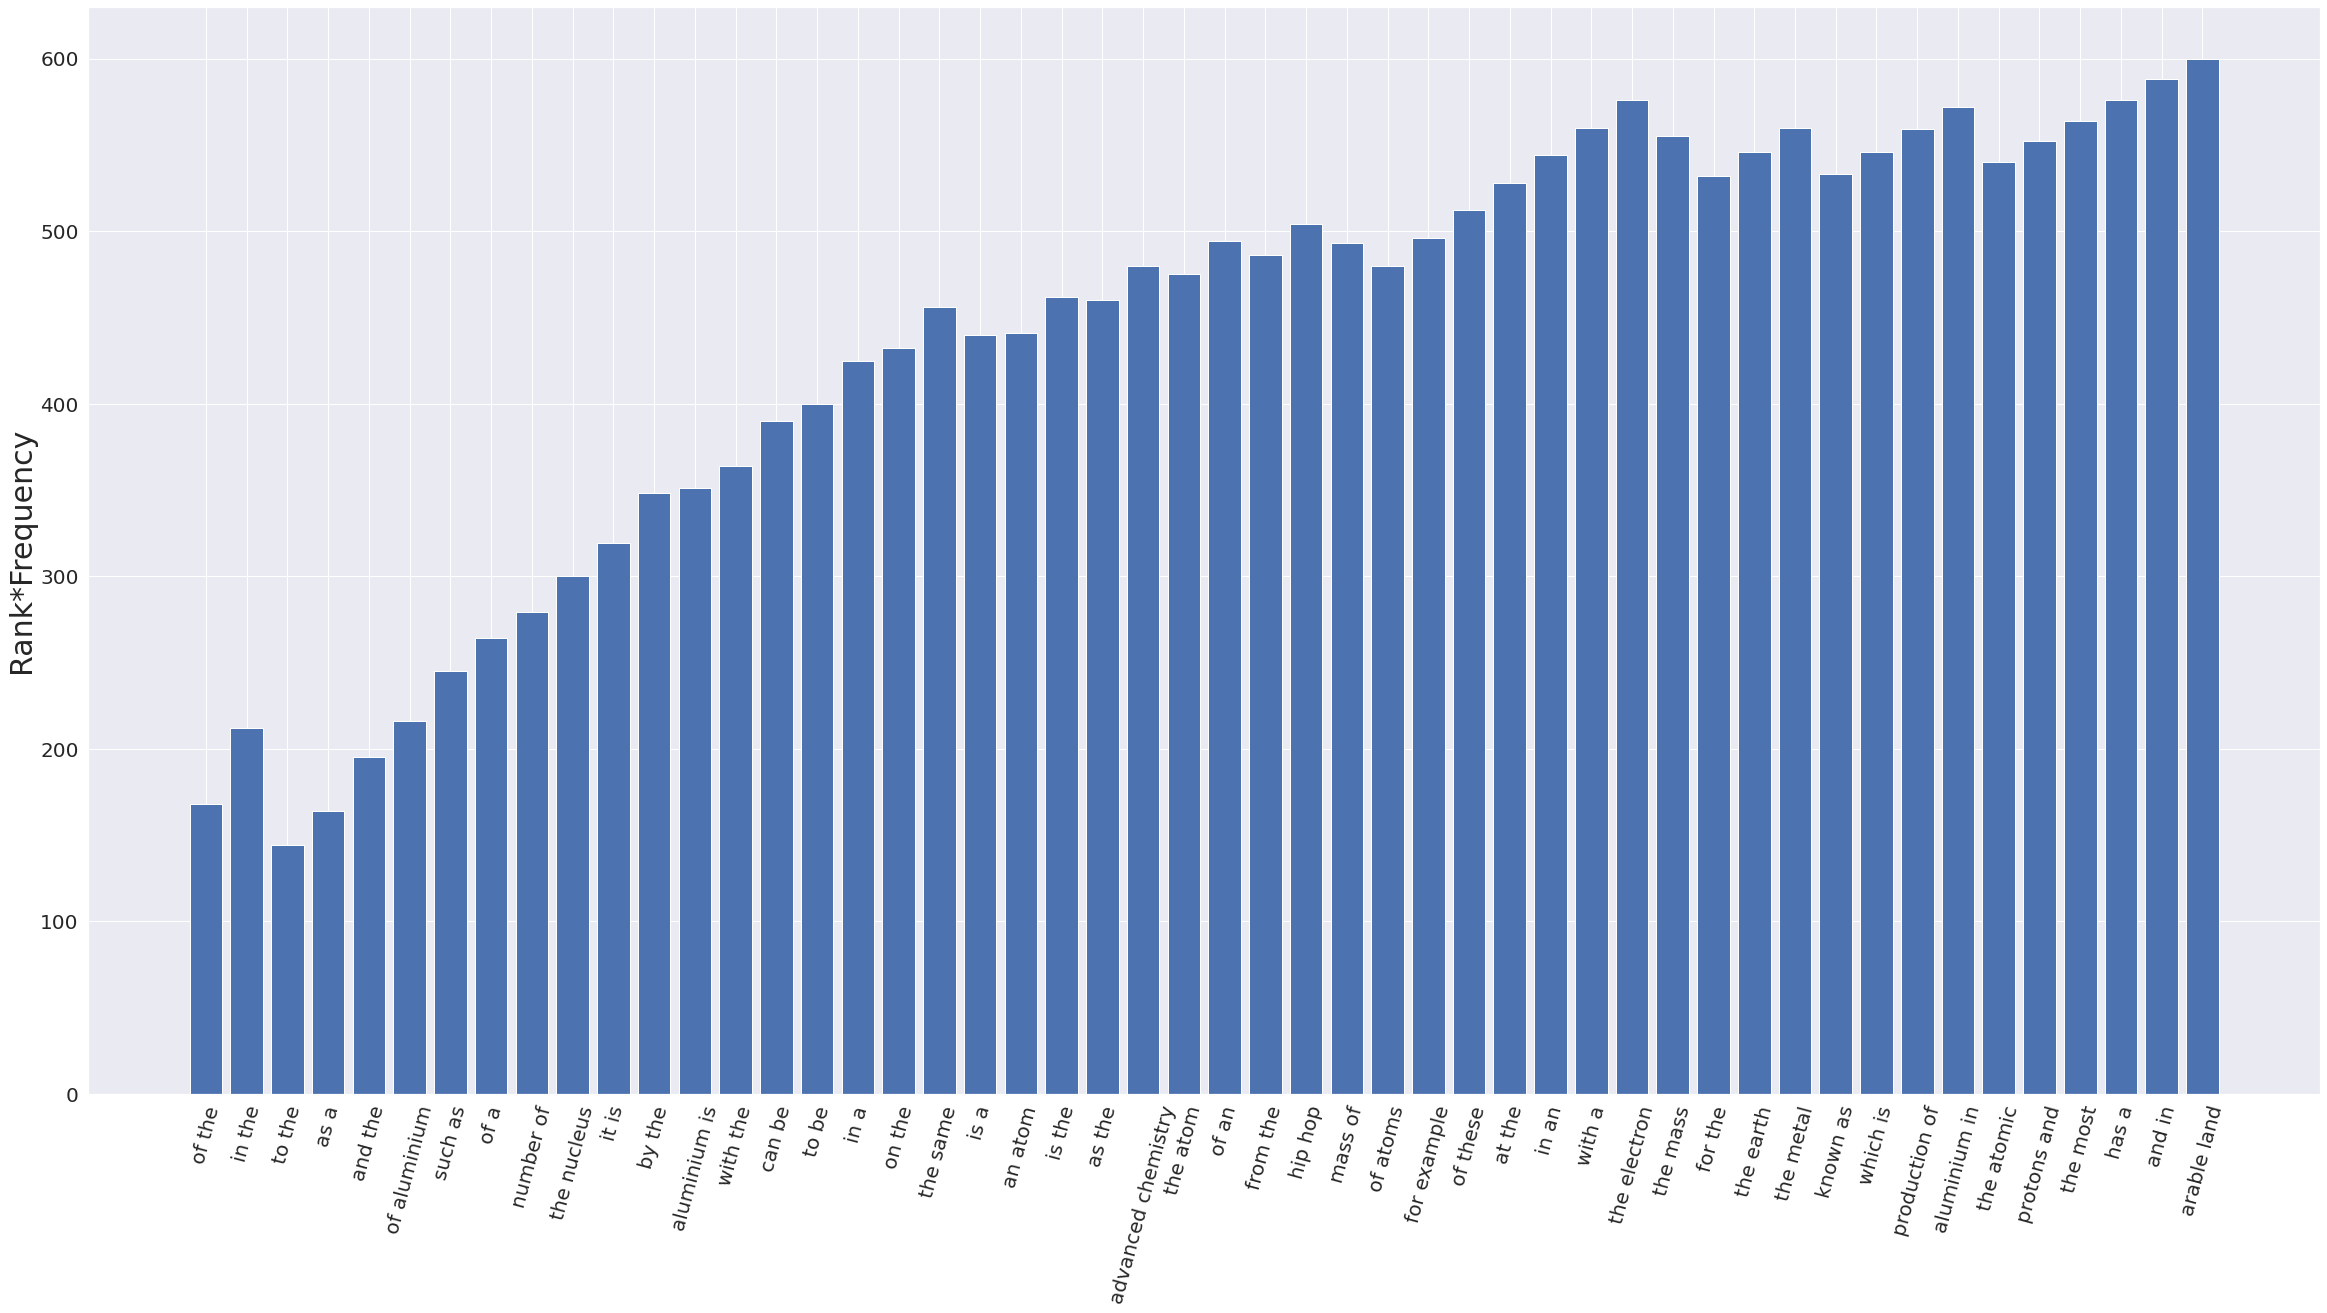

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(merged_bigrams[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 bigrams
plt.show()

###4)Find all possible trigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(en_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

trigrams = [item for item in ngrams(words_1, 3)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_trigrams = [sorted_trigrams[i][0]+ " " + sorted_trigrams[i][1] + " " + sorted_trigrams[i][2] for i in range(len(sorted_trigrams))]
print(merged_trigrams[:50])

['of an atom', 'of the atom', 'number of protons', 'the number of', 'the mass of', 'of the nucleus', 'protons and neutrons', 'in an atom', 'one of the', 'the production of', 'german hip hop', 'of radioactive decay', 'the amount of', 'the ratio of', 'the same number', 'of the electron', 'mass of the', 'a lower energy', 'part of the', 'the presence of', 'such as the', 'of the earth', 'in the universe', 'of the metal', 'the united states', 'used as a', 'as a result', 'a number of', 'known as the', 'the same element', 'of stable isotopes', 'in the same', 'according to the', 'a set of', 'of the mass', 'same number of', 'of these particles', 'in the nucleus', 'the radius of', 'number of neutrons', 'of protons and', 'the nucleus and', 'lower energy state', 'with atomic numbers', 'has an atomic', 'the magnetic field', 'can be used', 'be used to', 'as well as', 'aluminium is the']


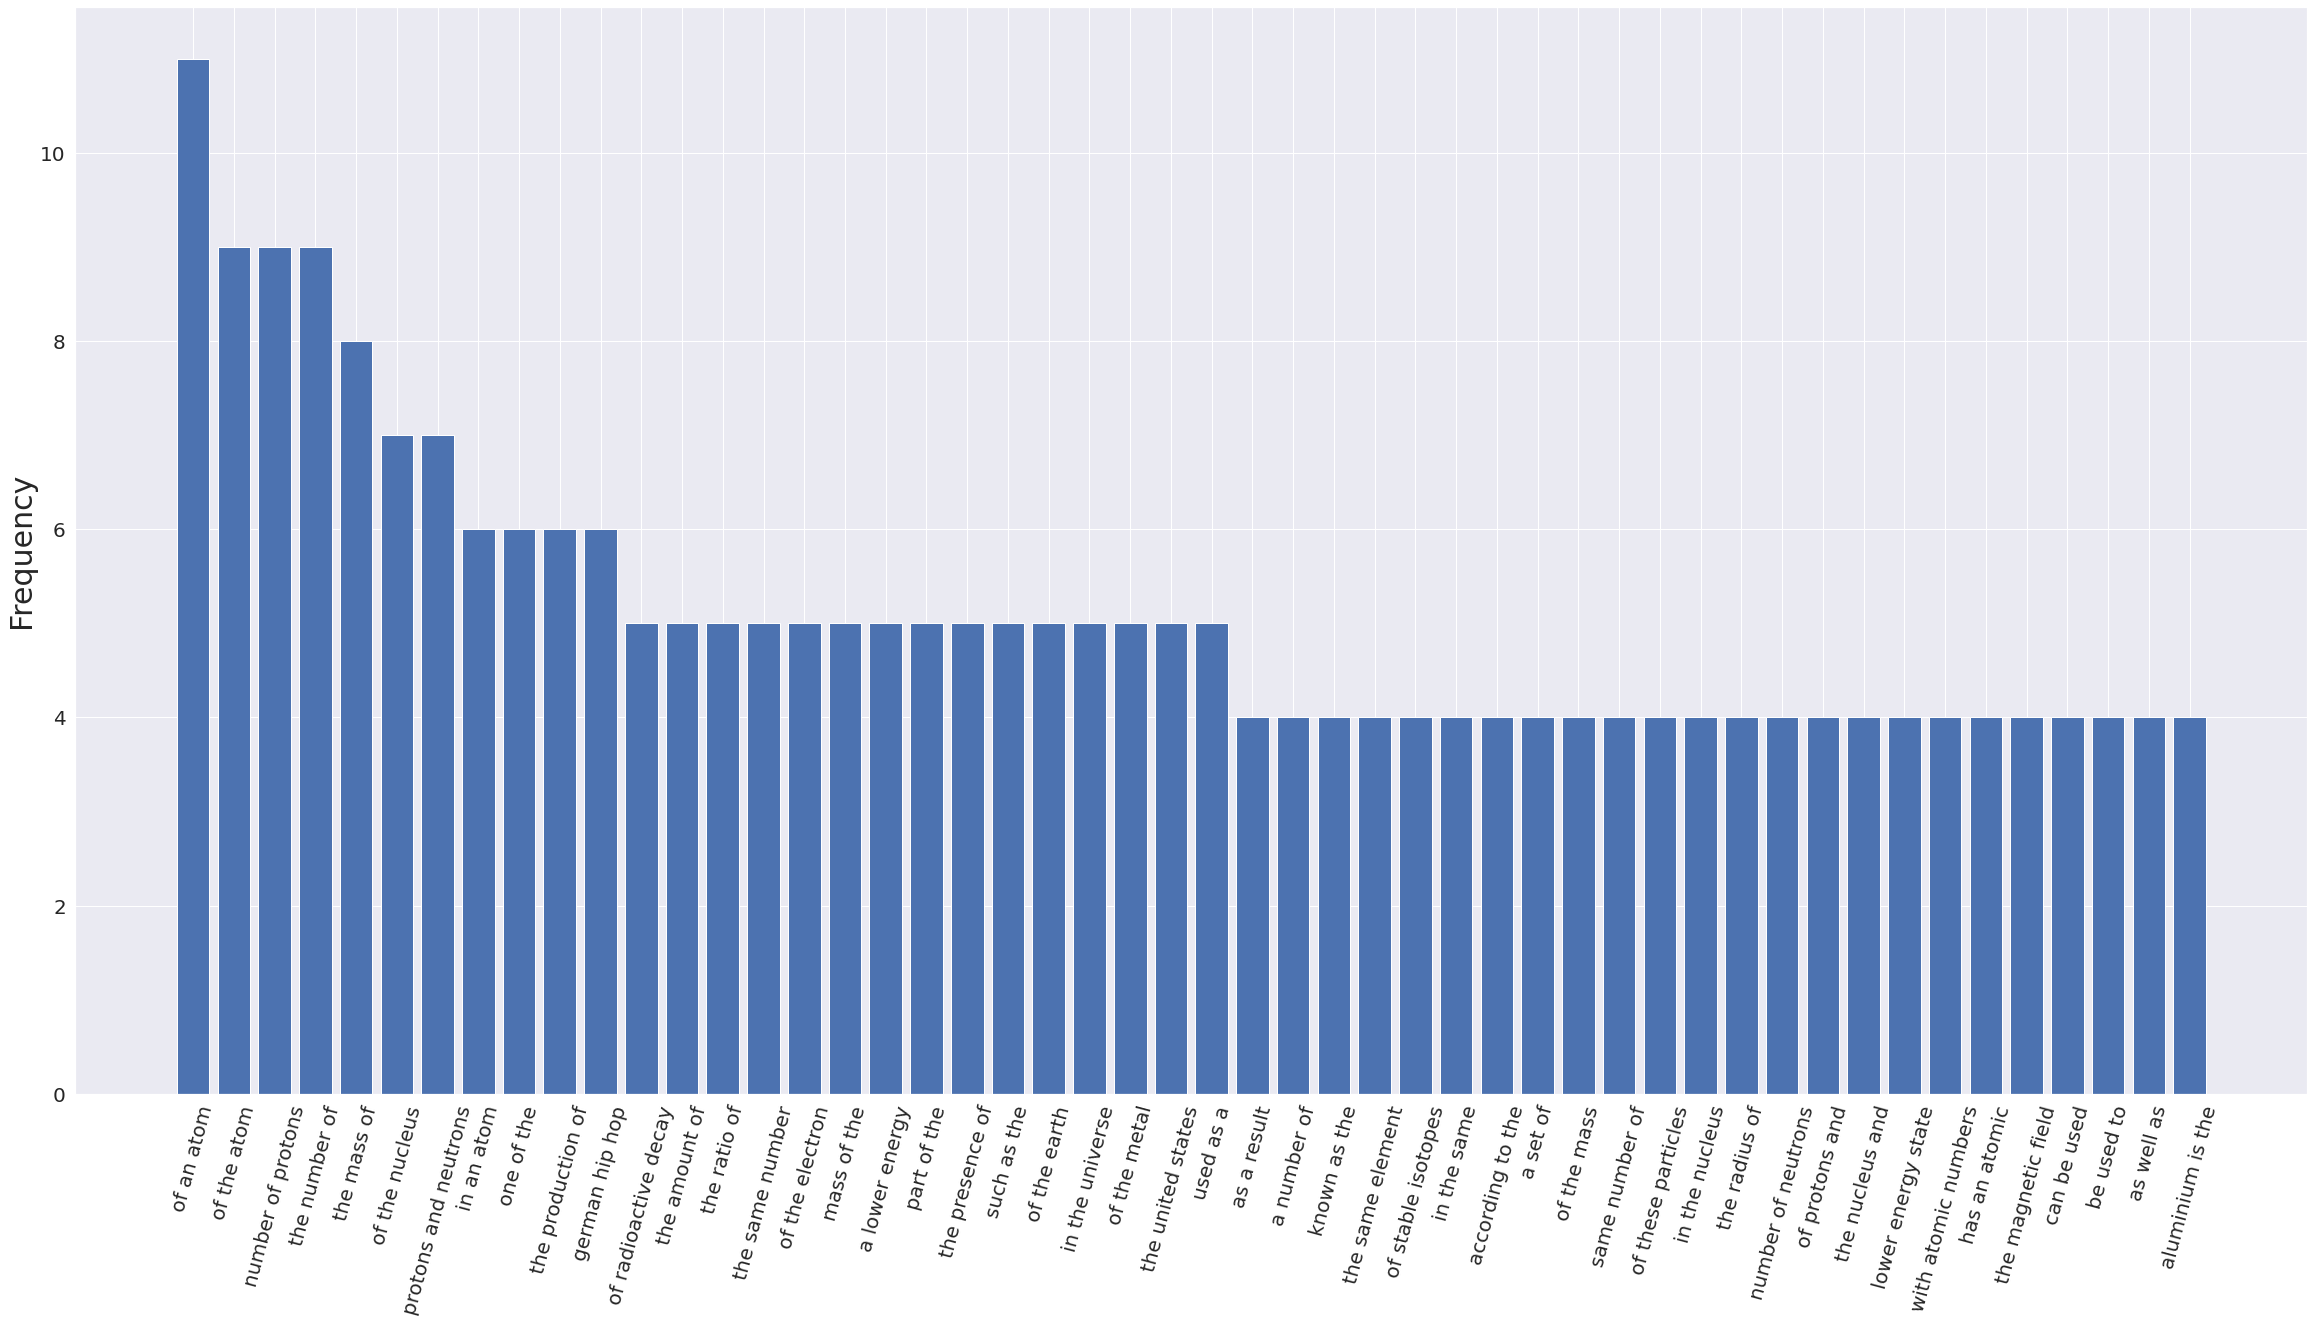

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(merged_trigrams[:50], frequency[:50]) #Plotting the 50 most common trigrams
plt.show()

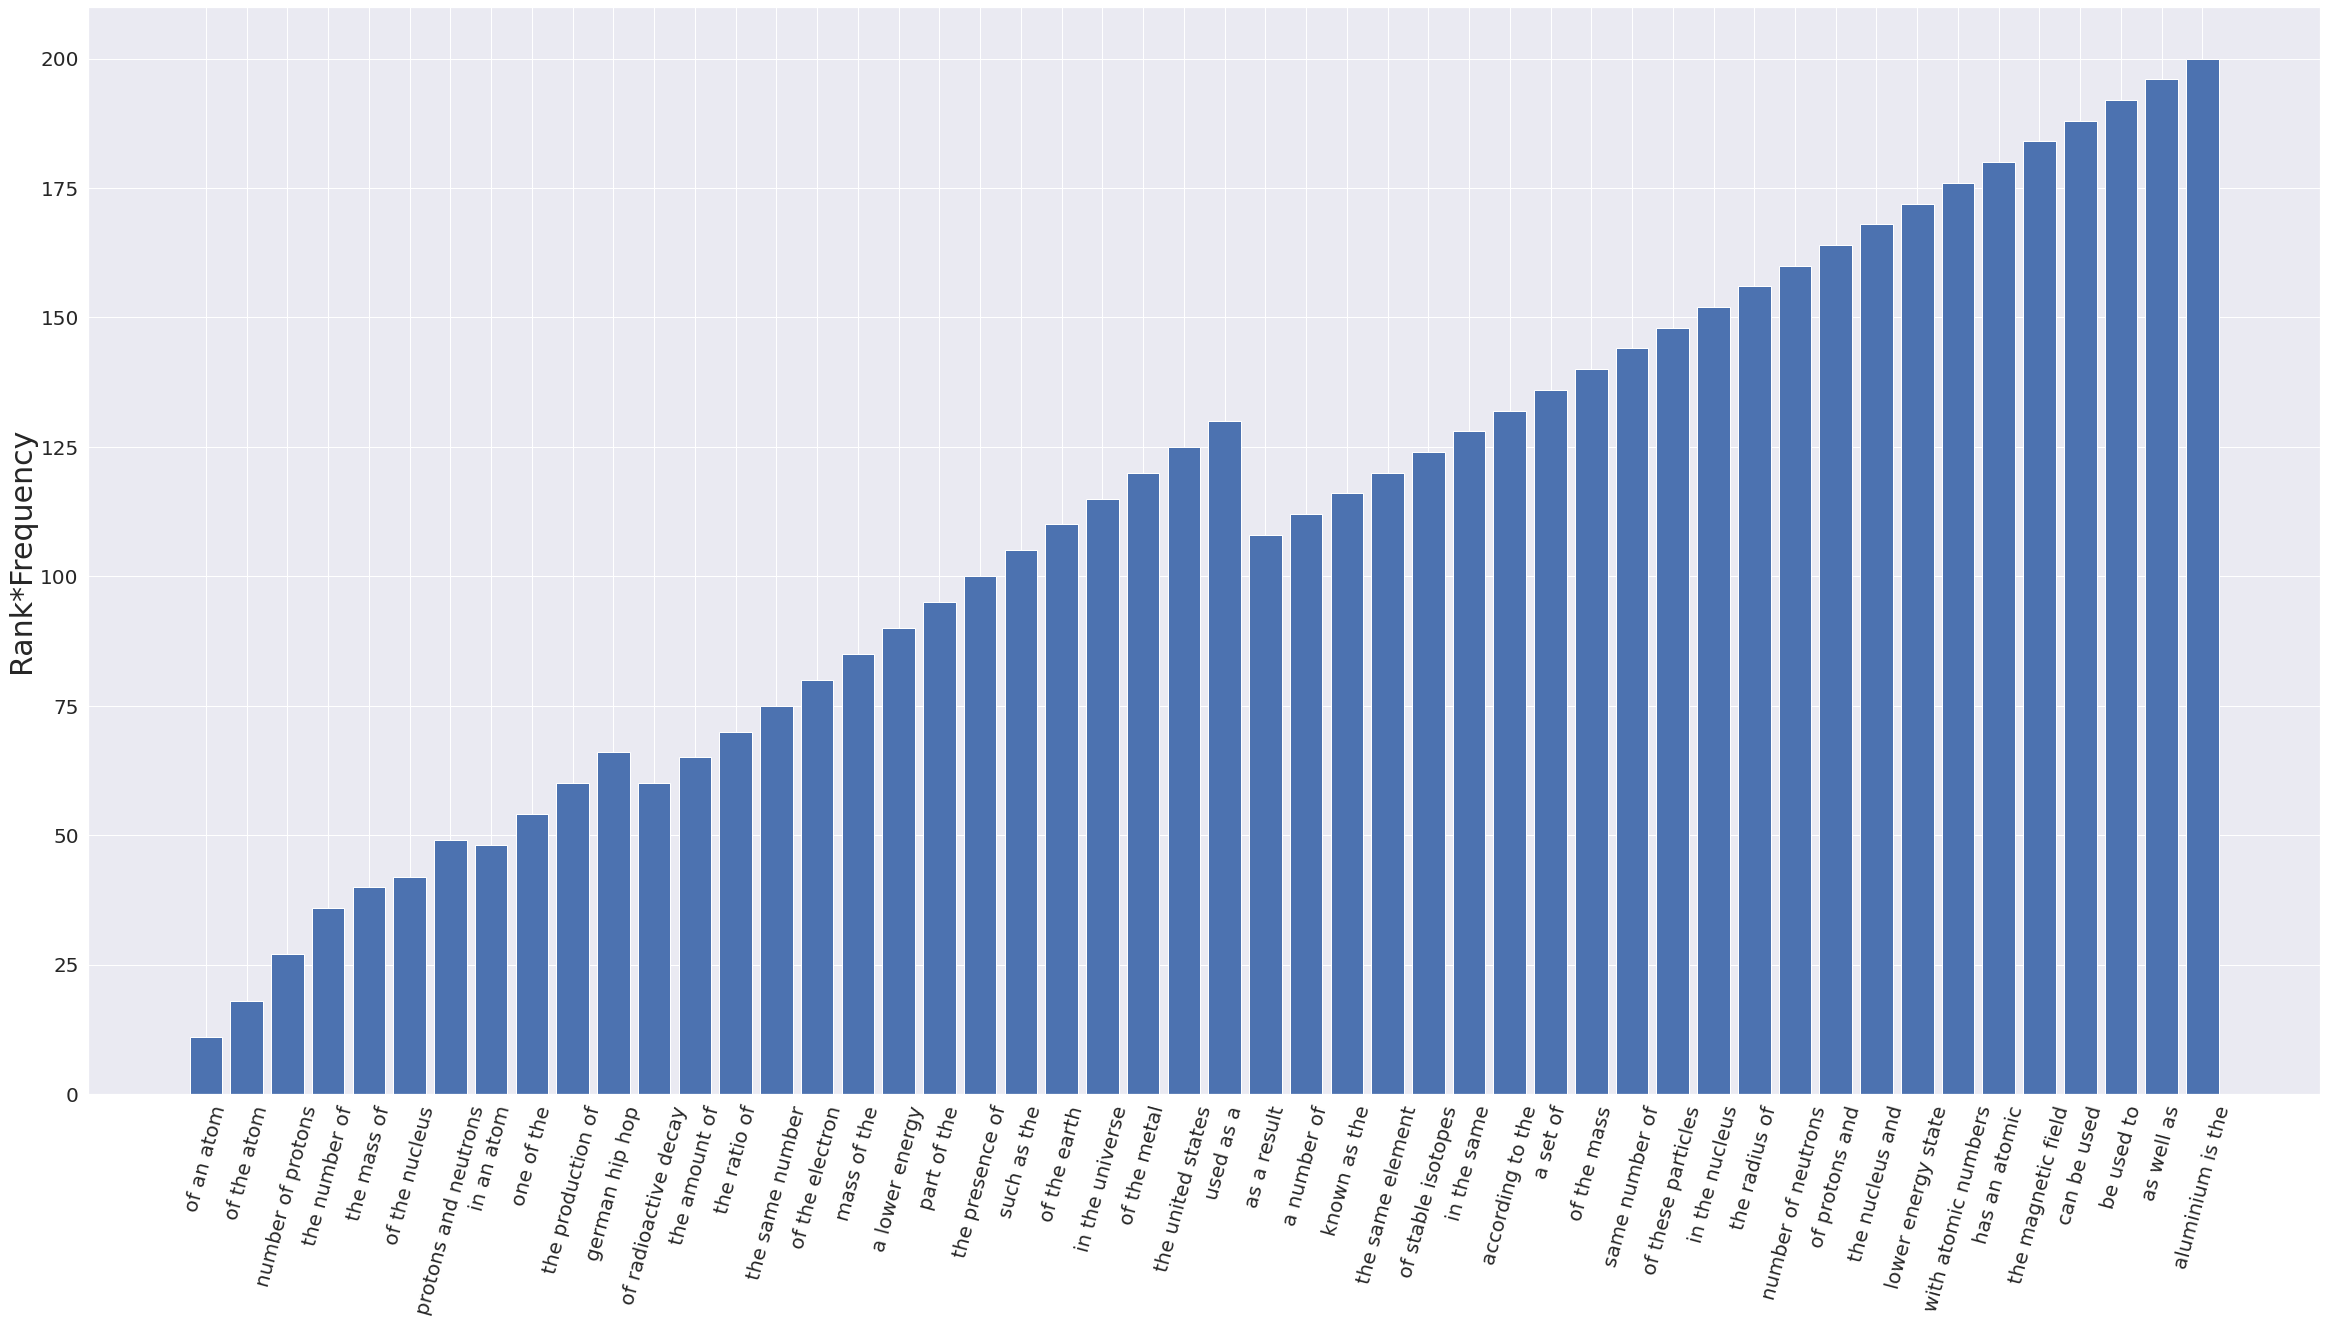

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(merged_trigrams[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 trigrams
plt.show()

##Q1.3.2)

###1) How many (most frequent) uni-grams are required for 90% coverage of the selected corpus?


In [ ]:
#Run the cells of Q2 under Q1.3.1 before running this cell
from collections import Counter 
frequency_dict = dict(Counter(words_1).most_common()) #frequency in order of most to least common

words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

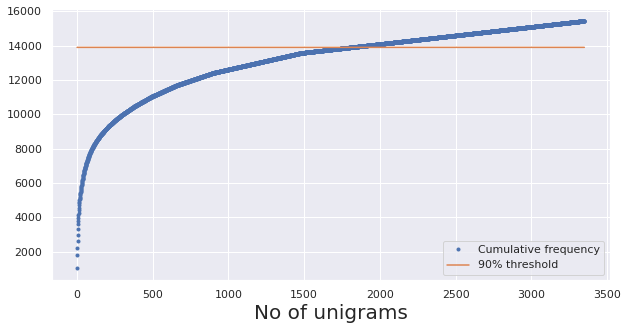

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.9*sum(frequency)]*len(frequency), label="90% threshold")
plt.xlabel("No of unigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.9*sum(frequency):
    print(i+1, "unigrams cover 90% of the entire corpus.")
    break

1808 unigrams cover 90% of the entire corpus.


###2) How many (most frequent) bi-grams are required for 80% coverage of the selected corpus?

In [ ]:
#Run the cells of Q3 under Q1.3.1 before running this cell
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

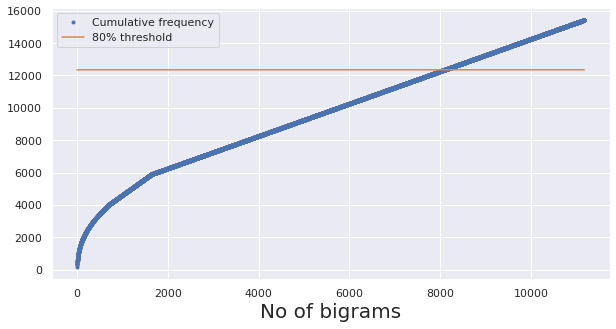

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.8*sum(frequency)]*len(frequency), label="80% threshold")
plt.xlabel("No of bigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.8*sum(frequency):
    print(i+1, "bigrams cover 80% of the entire corpus.")
    break

8090 bigrams cover 80% of the entire corpus.


###3) How many (most frequent) tri-grams are required for 70% coverage of the selected corpus?

In [ ]:
#Run the cells of Q4 under Q1.3.1 before running this cell
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

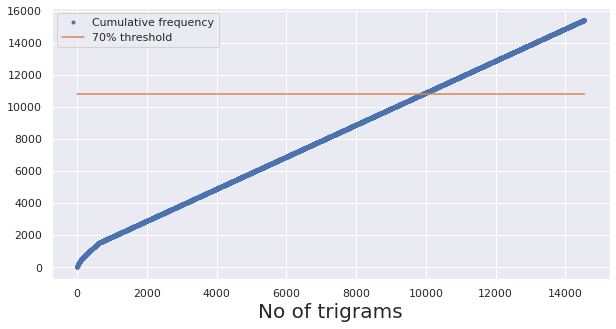

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.7*sum(frequency)]*len(frequency), label="70% threshold")
plt.xlabel("No of trigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.7*sum(frequency):
    print(i+1, "trigrams cover 70% of the entire corpus.")
    break

9912 trigrams cover 70% of the entire corpus.


##Q1.3.3 Heuristics

In [ ]:
#Sentence segmentation
sentences = []
previous = 0
heu_en_wiki = en_wiki.replace("\n", "") #Removing newline characters
for i in range(len(heu_en_wiki)):
  #if it is the end of the corpus then its a sentence
  if i==len(heu_en_wiki)-1: 
    sentences.append(heu_en_wiki[previous:i+1])
    previous = i+1
  #Full stops indicate towards an end of sentence #Checking whitespace after fullstop to eliminate decimal point
  elif heu_en_wiki[i]=="." and heu_en_wiki[i+1] == " ": 
    #Common cases for a full stop not being an end of sentence
    if heu_en_wiki[i-2:i]=="Dr" or heu_en_wiki[i-2:i]=="Mr" or heu_en_wiki[i-3:i]=="Mrs" or heu_en_wiki[i-2:i]=="Ms" or heu_en_wiki[i-2:i]=="Jr" or heu_en_wiki[i-1].isupper():
      pass
    else:  
      sentences.append(heu_en_wiki[previous:i+1])
      previous = i+1
  #Question mark and exclamation mark also mark end of sentence
  elif heu_en_wiki[i]=="?" or heu_en_wiki[i]=="!":
    sentences.append(heu_en_wiki[previous:i+1])
    previous = i+1

print(sentences)

['The word "atom" was coined by ancient Greek philosophers.', ' However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', ' As a result, their views on what atoms look like and how they behave were incorrect.', ' They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', ' It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', ' For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', ' This means that 100g of tin will combine either with 13.5g o

In [ ]:
#Word tokenization
heu_en_wiki = en_wiki.replace("\n", "") #Removing newline characters
heu_en_wiki = heu_en_wiki.lower() #Converting everything to lower case

heu_tokens = []
previous = 0
for i in range(len(heu_en_wiki)):
  if heu_en_wiki[i] == " ":
    string = heu_en_wiki[previous:i]
    string = string.replace("(", "").replace(")", "").replace('"', "").replace(".", "").replace(",", "")
    heu_tokens.append(string)
    previous = i+1
print(heu_tokens)

['the', 'word', 'atom', 'was', 'coined', 'by', 'ancient', 'greek', 'philosophers', 'however', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical', 'and', 'theological', 'reasoning', 'rather', 'than', 'evidence', 'and', 'experimentation', 'as', 'a', 'result', 'their', 'views', 'on', 'what', 'atoms', 'look', 'like', 'and', 'how', 'they', 'behave', 'were', 'incorrect', 'they', 'also', 'could', 'not', 'convince', 'everybody', 'so', 'atomism', 'was', 'but', 'one', 'of', 'a', 'number', 'of', 'competing', 'theories', 'on', 'the', 'nature', 'of', 'matter', 'it', 'was', 'not', 'until', 'the', '19th', 'century', 'that', 'the', 'idea', 'was', 'embraced', 'and', 'refined', 'by', 'scientists', 'when', 'the', 'blossoming', 'science', 'of', 'chemistry', 'produced', 'discoveries', 'that', 'only', 'the', 'concept', 'of', 'atoms', 'could', 'explainin', 'the', 'early', '1800s', 'john', 'dalton', 'used', 'the', 'concept', 'of', 'atoms', 'to', 'explain', 'why', 'elements', 'always', 'react', 'in', '

###1)How many (most frequent) uni-grams are required for 90% coverage of the selected corpus?


In [ ]:
#'history15/32003:459-485felbert', &
from nltk.util import ngrams

unigrams = [item for item in ngrams(heu_tokens, 1)]

In [ ]:
from collections import Counter 
frequency_dict = dict(Counter(heu_tokens).most_common()) #frequency in order of most to least common

words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.9*sum(frequency):
    print(i+1, "unigrams cover 90% of the entire corpus.")
    break

2277 unigrams cover 90% of the entire corpus.


###2)How many (most frequent) bi-grams are required for 80% coverage of the selected corpus?


In [ ]:
from nltk.util import ngrams

bigrams = [item for item in ngrams(heu_tokens, 2)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_bigrams = [sorted_bigrams[i][0]+ " " + sorted_bigrams[i][1] for i in range(len(sorted_bigrams))]

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.8*sum(frequency):
    print(i+1, "bigrams cover 80% of the entire corpus.")
    break

8419 bigrams cover 80% of the entire corpus.


###3)How many (most frequent) tri-grams are required for 70% coverage of the selected corpus?


In [ ]:
from nltk.util import ngrams

trigrams = [item for item in ngrams(heu_tokens, 3)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_trigrams = [sorted_trigrams[i][0]+ " " + sorted_trigrams[i][1] + " " + sorted_trigrams[i][2] for i in range(len(sorted_trigrams))]

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.7*sum(frequency):
    print(i+1, "trigrams cover 70% of the entire corpus.")
    break

10051 trigrams cover 70% of the entire corpus.


##1.3.4 Morphological Parsing

###1. Perform a morphological analysis of 5 words randomly sampled from 100 frequent words and 5 words randomly sampled from 100 least frequent words.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
# print("Pipeline:", nlp.pipe_names)

In [ ]:
most_frequent = dict(Counter(words_1).most_common(100))
words = list(most_frequent.keys())
frequency = list(most_frequent.values())

In [ ]:
from random import sample
most_frequent_sample = sample(words, 5)
print(most_frequent_sample)

['be', 'through', 'they', 'protons', 'numbers']


In [ ]:
for word in most_frequent_sample:
  word = nlp(word)
  print("Word:", word[0])
  print("Lemmatized form:", word[0].lemma_)
  print("Course grained part of speech:", word[0].pos_)
  print("Fine grained part of speech:", word[0].tag_)
  print("-"*5)

Word: be
Lemmatized form: be
Course grained part of speech: VERB
Fine grained part of speech: VB
-----
Word: through
Lemmatized form: through
Course grained part of speech: ADP
Fine grained part of speech: IN
-----
Word: they
Lemmatized form: they
Course grained part of speech: PRON
Fine grained part of speech: PRP
-----
Word: protons
Lemmatized form: proton
Course grained part of speech: NOUN
Fine grained part of speech: NNS
-----
Word: numbers
Lemmatized form: number
Course grained part of speech: NOUN
Fine grained part of speech: NNS
-----


In [ ]:
least_frequent = dict(Counter(words_1).most_common()[:-101:-1])
words = list(least_frequent.keys())
frequency = list(least_frequent.values())

In [ ]:
from random import sample
least_frequent_sample = sample(words, 5)
print(least_frequent_sample)

['anglicana', 'developing', 'theologian', 'worship', 'conveying']


In [ ]:
for word in least_frequent_sample:
  word = nlp(word)
  print("Word:", word[0])
  print("Lemmatized form:", word[0].lemma_)
  print("Course grained part of speech:", word[0].pos_)
  print("Fine grained part of speech:", word[0].tag_)
  print("-"*5)

Word: anglicana
Lemmatized form: anglicana
Course grained part of speech: PROPN
Fine grained part of speech: NNP
-----
Word: developing
Lemmatized form: develop
Course grained part of speech: VERB
Fine grained part of speech: VBG
-----
Word: theologian
Lemmatized form: theologian
Course grained part of speech: PROPN
Fine grained part of speech: NNP
-----
Word: worship
Lemmatized form: worship
Course grained part of speech: VERB
Fine grained part of speech: VB
-----
Word: conveying
Lemmatized form: convey
Course grained part of speech: VERB
Fine grained part of speech: VBG
-----


##1.3.5 Sub-word tokenization

###For 50 least frequent words

In [ ]:
import string
alphabet = list(string.ascii_uppercase) #list of Capital letters to replace the common byte pairs
alphabet_count = 0 # a counter to for indexing the alphabet list

least_frequent = dict(Counter(words_1).most_common()[:-51:-1])
words = list(least_frequent.keys())
frequency = list(least_frequent.values())
character_vocab = [] # this list will contain the characters seen in the words

for word in words: #iterate through the words to build the character vocabulary
  word = word+">" # > marks the end of the word 

  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

iter = 3
for k in range(iter):
  bp_dict = {} #this will contain the byte pairs as keys and the no. of occurences as values
  print("The vocabulary of characters:" , character_vocab)
  words = list(least_frequent.keys())

  for word in words: #this loop builds the byte pair dictionary
    if len(word)>=2: #For a byte pair there should be atleast two characters in the word
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1*least_frequent[word] #for every occurence, we need to add the number times the word occurs in the corpus
        else:
          bp_dict[word[i] + word[i+1]] = 1*least_frequent[word]
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = [] #this will contain the bp which occurs most often

  for key in bp_dict.keys(): #this loop is to build the most_frequent_bp array
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1: #byte pair should occur atleast twice for it to be replaced by a token
    for bp in most_frequent_bp: #this loop will add the most frequent byte pairs to the character vocabulary 
      character_vocab.append(bp)
  
    for bp in most_frequent_bp: #this loop replaces all the byte pairs in the words with the tokens  
      for key in least_frequent.keys():
        if bp in key: #if the key/word has the byte pair then replace it
          dummy = key.replace(bp, alphabet[alphabet_count])
          least_frequent[dummy] = least_frequent.pop(key) #create a new key in the dict with the new word and remove the old key
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['d', 'e', 'v', 'i', 'a', 't', 'o', 'n', '>', 'p', 'r', 'm', 's', 'l', 'g', 'b', 'c', 'u', 'y', 'h', 'f', '1', '6', '2', 'w']
The byte-pair counts are {'de': 4, 'ev': 4, 'vi': 3, 'ia': 3, 'at': 7, 'ti': 5, 'io': 2, 'on': 4, 'pa': 2, 'ar': 3, 'ra': 6, 'am': 1, 'me': 3, 'et': 2, 'te': 9, 'er': 6, 'rs': 1, 've': 5, 'el': 4, 'lo': 4, 'op': 3, 'pi': 2, 'in': 16, 'ng': 9, 'bo': 1, 'ol': 5, 'ld': 1, 'pr': 6, 'ri': 6, 'nc': 2, 'ci': 2, 'ip': 1, 'pl': 1, 'le': 2, 'es': 7, 'do': 2, 'oc': 2, 'ct': 3, 'tr': 3, 'na': 2, 'al': 3, 'va': 1, 'ag': 2, 'gu': 2, 'ue': 1, 'po': 1, 'pe': 2, 'im': 1, 'ma': 5, 'ac': 3, 'cy': 1, 're': 4, 'ec': 2, 'co': 4, 'og': 3, 'gn': 1, 'ni': 4, 'is': 5, 'se': 4, 'ed': 8, 'ca': 4, 'th': 5, 'ho': 3, 'li': 6, 'ic': 4, 'cs': 1, 'ha': 1, 'an': 7, 'nd': 5, 'ro': 2, 'ot': 3, 'st': 6, 'ta': 3, 'nt': 5, 'ts': 4, 'ad': 1, 'di': 5, 'en': 5, 'ee': 1, 'nf': 1, 'fl': 1, 'fo': 2, 'ou': 3, 'un': 2, 'da': 1, 'be': 1, 'ie': 2, 'ay': 1, 'yi': 2, 'ns': 2, 'sl': 1

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['deviation', 'bold', 'vague', 'pope', 'primacy', 'recognised', 'catholics', 'hand', 'radical', 'conflict', 'foundation', 'loosely', 'credendi', 'orandi', 'theology', 'guide', 'offshoots', '1662', 'appealed', 'summary', 'theologian', 'governed', 'vernacular', 'ecumenism', 'catholicity', 'outset', 'established', 'relied', 'documents', 'prAciples', 'doctrAal', 'divAes', 'parameBrs', 'proBstants', 'sevenBenth', 'protracBd', 'translaBd', 'presbyBrian', 'magisBrium', 'episcopaB', 'westmAsBr', 'developC', 'believC', 'prayC', 'AculcatC', 'foundC', 'manifestC', 'conveyC', 'maAtaAC', 'writCs']


### For 50 most frequent words

In [ ]:
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0
most_frequent = dict(Counter(words_1).most_common(50))
words = list(most_frequent.keys())
frequency = list(most_frequent.values())
character_vocab = []
for word in words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
  words = list(most_frequent.keys())
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1*most_frequent[word]
        else:
          bp_dict[word[i] + word[i+1]] = 1*most_frequent[word]
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for key in most_frequent.keys():
        if bp in key:
          dummy = key.replace(bp, alphabet[alphabet_count])
          
          most_frequent[dummy] = most_frequent.pop(key)
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['t', 'h', 'e', '>', 'o', 'f', 'i', 'n', 'a', 'd', 's', 'l', 'u', 'm', 'r', 'w', 'b', 'y', 'c', 'g', 'v', 'p']
The byte-pair counts are {'th': 1611, 'he': 1193, 'of': 735, 'in': 632, 'an': 669, 'nd': 435, 'to': 543, 'is': 362, 'al': 256, 'lu': 215, 'um': 481, 'mi': 269, 'ni': 215, 'iu': 215, 'as': 358, 'ha': 322, 'at': 391, 'ar': 186, 're': 186, 'fo': 140, 'or': 254, 'wi': 137, 'it': 254, 'by': 135, 'hi': 163, 'om': 264, 'ms': 81, 'be': 128, 'wh': 77, 'ic': 170, 'ch': 120, 'en': 109, 'ne': 105, 'er': 167, 'rg': 69, 'gy': 69, 'ca': 66, 'fr': 65, 'ro': 163, 'wa': 63, 'av': 62, 've': 62, 'on': 193, 'us': 102, 'se': 99, 'ed': 53, 'el': 138, 'le': 226, 'ec': 98, 'ct': 98, 'tr': 98, 'ns': 53, 'ei': 52, 'ir': 52, 'ma': 52, 'ss': 52, 'nu': 100, 'mb': 51, 'no': 49, 'ot': 96, 'uc': 92, 'cl': 88, 'eu': 49, 'ts': 88, 'es': 85, 'su': 43, 'me': 81, 'et': 41, 'ta': 41, 'em': 40, 'nt': 40, 'pa': 39, 'rt': 39, 'ti': 39, 'mo': 39, 'la': 39}
token to be replaced next: th wit

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['of', 'in', 'and', 'a', 'to', 'is', 'aluminium', 'as', 'are', 'for', 'by', 'an', 'atoms', 'be', 'which', 'or', 'it', 'energy', 'can', 'has', 'from', 'atom', 'was', 'have', 'on', 'atomic', 'used', 'electrons', 'mass', 'number', 'not', 'nucleus', 'its', 'electron', 'at', 'such', 'metal', 'elements', 'particles', 'more', 'land', 'one', 'Aat', 'wiA', 'Ais', 'Aan', 'B', 'Bir', 'oBr', 'Bse']


###3) Select 10 words that are not in the corpus

In [ ]:
selected_words = ["intelligent", "systems", "interfaces", "natural", "language", "processing", "machine", "learning", "artificial", "reinforcement"]

In [ ]:
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in selected_words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = selected_words.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['i', 'n', 't', 'e', 'l', 'g', '>', 's', 'y', 'm', 'r', 'f', 'a', 'c', 'u', 'p', 'o', 'h']
The byte-pair counts are {'in': 6, 'nt': 4, 'te': 3, 'el': 1, 'll': 1, 'li': 1, 'ig': 1, 'ge': 2, 'en': 2, 'sy': 1, 'ys': 1, 'st': 1, 'em': 2, 'ms': 1, 'er': 1, 'rf': 1, 'fa': 1, 'ac': 2, 'ce': 3, 'es': 2, 'na': 1, 'at': 1, 'tu': 1, 'ur': 1, 'ra': 1, 'al': 2, 'la': 1, 'an': 1, 'ng': 3, 'gu': 1, 'ua': 1, 'ag': 1, 'pr': 1, 'ro': 1, 'oc': 1, 'ss': 1, 'si': 1, 'ma': 1, 'ch': 1, 'hi': 1, 'ne': 1, 'le': 1, 'ea': 1, 'ar': 2, 'rn': 1, 'ni': 1, 'rt': 1, 'ti': 1, 'if': 1, 'fi': 1, 'ic': 1, 'ci': 1, 'ia': 1, 're': 1, 'ei': 1, 'nf': 1, 'fo': 1, 'or': 1, 'rc': 1, 'me': 1}
token to be replaced next: in with A
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['i', 'n', 't', 'e', 'l', 'g', '>', 's', 'y',

###4)Compare BPE tokenization of the 10 words selected during Morphological analysis with their morphemes

In [ ]:
selected_words = most_frequent_sample + least_frequent_sample
morphemes = []
for word in selected_words:
  doc = nlp(word)
  morphemes.append(doc[0].lemma_)



In [ ]:
#orginal words
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in selected_words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = selected_words.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['b', 'e', '>', 't', 'h', 'r', 'o', 'u', 'g', 'y', 'p', 'n', 's', 'm', 'a', 'l', 'i', 'c', 'd', 'v', 'w']
The byte-pair counts are {'be': 2, 'th': 3, 'hr': 1, 'ro': 2, 'ou': 1, 'ug': 1, 'gh': 1, 'he': 2, 'ey': 2, 'pr': 1, 'ot': 1, 'to': 1, 'on': 2, 'ns': 1, 'nu': 1, 'um': 1, 'mb': 1, 'er': 1, 'rs': 2, 'an': 3, 'ng': 3, 'gl': 1, 'li': 1, 'ic': 1, 'ca': 1, 'na': 1, 'de': 1, 'ev': 1, 've': 2, 'el': 1, 'lo': 2, 'op': 1, 'pi': 1, 'in': 2, 'eo': 1, 'ol': 1, 'og': 1, 'gi': 1, 'ia': 1, 'wo': 1, 'or': 1, 'sh': 1, 'hi': 1, 'ip': 1, 'co': 1, 'nv': 1, 'yi': 1}
token to be replaced next: th with A
token to be replaced next: an with B
token to be replaced next: ng with C
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['b', 'e', '>', 't', 'h', 'r', 'o', 'u', 'g', 'y', 'p', 'n', 's', 'm', 'a

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['D', 'AEugh', 'Fy', 'pEtHs', 'numDI', 'BglicBa', 'deJKpL', 'FoKgiB', 'woIhip', 'cHvGL']


In [ ]:
#morphemes
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in morphemes:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = morphemes.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['b', 'e', '>', 't', 'h', 'r', 'o', 'u', 'g', 'y', 'p', 'n', 'm', 'a', 'l', 'i', 'c', 'd', 'v', 'w', 's']
The byte-pair counts are {'be': 2, 'th': 3, 'hr': 1, 'ro': 2, 'ou': 1, 'ug': 1, 'gh': 1, 'he': 2, 'ey': 2, 'pr': 1, 'ot': 1, 'to': 1, 'on': 2, 'nu': 1, 'um': 1, 'mb': 1, 'er': 1, 'an': 3, 'ng': 1, 'gl': 1, 'li': 1, 'ic': 1, 'ca': 1, 'na': 1, 'de': 1, 'ev': 1, 've': 2, 'el': 1, 'lo': 2, 'op': 1, 'eo': 1, 'ol': 1, 'og': 1, 'gi': 1, 'ia': 1, 'wo': 1, 'or': 1, 'rs': 1, 'sh': 1, 'hi': 1, 'ip': 1, 'co': 1, 'nv': 1}
token to be replaced next: th with A
token to be replaced next: an with B
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['b', 'e', '>', 't', 'h', 'r', 'o', 'u', 'g', 'y', 'p', 'n', 'm', 'a', 'l', 'i', 'c', 'd', 'v', 'w', 's', 'th', 'an']
The byte-pair counts are {'b

In [ ]:
print("The tokenized words", words)

The tokenized words ['C', 'ADugh', 'Ey', 'pDtG', 'numCr', 'BglicBa', 'deHIp', 'EoIgiB', 'worship', 'cGvF']


#Hindi

##Q 1.3.1)

In [ ]:
f = open('hi_wiki.txt', 'r')
hi_wiki = f.read()
f.close()
hi_wiki = hi_wiki[:100094] #Due to session crashes, I considering only a part of the corpus, first 743 sentences to be precise.

###1)a) Sentence segmentation and word tokenization using NLTK

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = sent_tokenize(hi_wiki) #Sentence segmentation
for sentence in sentences:
  print(sentence)

मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं। यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं। इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।

इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है। यह डिग्री प्रोग्राम स्वास्थ्य विषय के

In [ ]:
tokens = word_tokenize(hi_wiki) #word tokenization
print(tokens) #Even fullstops, commas and brackets are tokenized

['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', '(', 'एमएचए', 'या', 'एम.एच.ए', ')', 'स्नातकोत्तर', '(', 'पोस्ट', 'ग्रेजुएशन', ')', 'की', 'एक', 'पेशेवर', 'डिग्री', 'है', 'जो', 'स्वास्थ्य', 'प्रशासन', 'के', 'क्षेत्र', 'में', 'दी', 'जाती', 'हैं।', 'यह', 'उन', 'छात्रों', 'को', 'प्रदान', 'की', 'जाती', 'हैं', 'जिन्होंने', 'स्वास्थ्य', 'प्रशासन', ',', 'अस्पताल', 'प्रबंधन', 'एवं', 'अन्य', 'स्वास्थ्य', 'सेवा', 'संगठनों', 'के', 'क्षेत्र', 'में', 'जरूरी', 'ज्ञान', 'और', 'दक्षता', 'हासिल', 'की', 'हैं।', 'इन', 'पाठ्यक्रमो', 'में', 'परिस्थितियों', 'के', 'अनुसार', 'इनके', 'सरंचना', 'में', 'अंतर', 'हो', 'सकता', 'हैं', 'हालांकि', 'व्यवसायी-शिक्षक', 'मॉडल', 'कार्यक्रम', 'आमतौर', 'पर', 'चिकित्सा', ',', 'स्वास्थ्य', 'व्यवसायों', 'या', 'संबद्ध', 'स्वास्थ्य', 'के', 'कॉलेजों', 'में', 'पाए', 'जाते', 'हैं', ',', 'कक्षा-आधारित', 'कार्यक्रम', 'व्यवसाय', 'या', 'सार्वजनिक', 'स्वास्थ्य', 'के', 'कॉलेजों', 'में', 'होते', 'हैं।', 'इस', 'पाठ्यक्रम', 'के', 'अध्ययन', 'के'

In [ ]:
words_1 = [word for word in tokens if word.isalnum()]#Removing brackets, commas and other punctuation

print(words_1)

['ऑफ', 'एमएचए', 'एक', 'यह', 'उन', 'और', 'इन', 'पर', 'इस', 'आम', 'पर', 'और', 'यह', 'गहन', 'समझ', 'और', 'यह', 'और', 'ऑफ', 'यह', 'और', 'पर', 'पर', 'एमएचए', 'और', 'और', 'उन', 'और', 'और', 'और', 'इस', 'कई', 'ओन', 'द', 'इन', 'एचओएम', 'एमएचए', 'एमएचए', 'कम', 'और', 'पर', 'इन', 'ऑफ', 'कई', 'आगमन', 'इन', 'यह', '२', '४', '6', 'एक', 'इन', 'एचआर', 'इन', 'इस', 'एचए', 'एक', '50', 'चयन', 'पर', 'ऑफ', '13', 'मई', '1969', 'ऑल', '2004', 'गए', '2009', 'और', '2014', 'आम', '2019', 'आम', 'वह', 'ऑल', 'ए', 'एक', 'एक', 'वह', 'दशक', 'तक', '13', 'मई', '1969', 'और', 'वह', 'एक', 'दल', 'ऑल', '18', '1957', 'वह', 'पद', '1962', '1984', 'गए', 'और', '2004', 'तक', 'जब', 'पद', '2008', '1994', 'और', 'वह', 'एक', 'और', 'इन', 'और', 'कर', 'छह', 'एक', 'uddin', '2010', 'और', 'वह', '24', '2018', 'आलम', 'और', 'बरकत', 'आलम', 'एक', 'वह', 'और', 'कई', 'एक', 'तरह', 'इस', '2014', 'गए', '23', '18', '1', '9', '30', 'दल', 'और', '2008', 'और', 'सईद', 'और', 'वह', 'यह', 'वह', 'हज', 'पर', '2016', 'यह', 'गई', 'और', 'आईएसआईएस', 'एक', 'और', 'नरक', '2

###b) using SpaCy

In [ ]:
# Import the English language class
import spacy

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm") #Loading the training pipeline module
doc = nlp(hi_wiki)

In [ ]:
for sent in doc.sents: #Sentence segmentation
    print(sent.text)

मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.
ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन)
की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं। यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं। इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।

इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है। यह डिग्री प्रोग्राम स्वास्थ्य विषय क

In [ ]:
#Word tokenization 
words_2 = [token for token in doc if token.text.isalnum()] #Retaining only alpha numeric characters ie. removing brackets, commas etc. 

print(words_2)

[ऑफ, एमएचए, एम, एच, ए, एक, यह, उन, और, इन, पर, इस, आम, पर, और, यह, गहन, समझ, और, यह, और, ऑफ, यह, और, पर, पर, एमएचए, और, और, उन, और, और, और, इस, कई, ओन, द, इन, एचओएम, एमएचए, एमएचए, कम, और, पर, इन, ऑफ, कई, आगमन, इन, यह, २, ४, 6, एक, इन, एचआर, इन, इस, एचए, एक, 50, चयन, पर, ऑफ, 13, मई, 1969, ऑल, ए, 2004, गए, 2009, और, 2014, आम, गए, 2019, आम, वह, ऑल, ए, एक, एक, वह, दशक, तक, 13, मई, 1969, और, वह, एक, दल, ए, ऑल, ए, 18, 1957, वह, पद, 1962, गए, 1984, गए, और, 2004, तक, जब, पद, 2008, 1994, और, वह, एक, और, इन, और, कर, छह, एक, uddin, 2010, और, वह, 24, 2018, आलम, और, बरकत, आलम, एक, वह, और, ए, कई, एक, तरह, इस, 2014, गए, 23, 18, 1, 9, 30, दल, और, 2008, और, सईद, और, वह, यह, वह, हज, पर, 2016, यह, गई, और, आईएसआईएस, एक, और, नरक, 2016, अरब, और, जहर, 2016, २०११, एक, एक, 2017, वध, पर, पर, और, और, यह, 2018, जब, एक, आम, 2019, 2019, 40, और, और, कई, पर, और, 2005, 20, 2013, 14, और, कर, 16, 2005, एक, एमआईएम, और, तहत, 2009, एक, सईद, और, पर, 2013, 2014, नफरत, 2015, हर, और, और, यह, घर, कई, 7, 2016, कर, और, एक, पर, सई

###2)Find all possible unigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(hi_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

unigrams = [item for item in ngrams(words_1, 1)]
print(unigrams)

[('ऑफ',), ('एमएचए',), ('एक',), ('यह',), ('उन',), ('और',), ('इन',), ('पर',), ('इस',), ('आम',), ('पर',), ('और',), ('यह',), ('गहन',), ('समझ',), ('और',), ('यह',), ('और',), ('ऑफ',), ('यह',), ('और',), ('पर',), ('पर',), ('एमएचए',), ('और',), ('और',), ('उन',), ('और',), ('और',), ('और',), ('इस',), ('कई',), ('ओन',), ('द',), ('इन',), ('एचओएम',), ('एमएचए',), ('एमएचए',), ('कम',), ('और',), ('पर',), ('इन',), ('ऑफ',), ('कई',), ('आगमन',), ('इन',), ('यह',), ('२',), ('४',), ('6',), ('एक',), ('इन',), ('एचआर',), ('इन',), ('इस',), ('एचए',), ('एक',), ('50',), ('चयन',), ('पर',), ('ऑफ',), ('13',), ('मई',), ('1969',), ('ऑल',), ('2004',), ('गए',), ('2009',), ('और',), ('2014',), ('आम',), ('2019',), ('आम',), ('वह',), ('ऑल',), ('ए',), ('एक',), ('एक',), ('वह',), ('दशक',), ('तक',), ('13',), ('मई',), ('1969',), ('और',), ('वह',), ('एक',), ('दल',), ('ऑल',), ('18',), ('1957',), ('वह',), ('पद',), ('1962',), ('1984',), ('गए',), ('और',), ('2004',), ('तक',), ('जब',), ('पद',), ('2008',), ('1994',), ('और',), ('वह',), ('एक',), ('

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(words_1).most_common()) #frequency in order of most to least common

In [ ]:
print(words_1)

['ऑफ', 'एमएचए', 'एक', 'यह', 'उन', 'और', 'इन', 'पर', 'इस', 'आम', 'पर', 'और', 'यह', 'गहन', 'समझ', 'और', 'यह', 'और', 'ऑफ', 'यह', 'और', 'पर', 'पर', 'एमएचए', 'और', 'और', 'उन', 'और', 'और', 'और', 'इस', 'कई', 'ओन', 'द', 'इन', 'एचओएम', 'एमएचए', 'एमएचए', 'कम', 'और', 'पर', 'इन', 'ऑफ', 'कई', 'आगमन', 'इन', 'यह', '२', '४', '6', 'एक', 'इन', 'एचआर', 'इन', 'इस', 'एचए', 'एक', '50', 'चयन', 'पर', 'ऑफ', '13', 'मई', '1969', 'ऑल', '2004', 'गए', '2009', 'और', '2014', 'आम', '2019', 'आम', 'वह', 'ऑल', 'ए', 'एक', 'एक', 'वह', 'दशक', 'तक', '13', 'मई', '1969', 'और', 'वह', 'एक', 'दल', 'ऑल', '18', '1957', 'वह', 'पद', '1962', '1984', 'गए', 'और', '2004', 'तक', 'जब', 'पद', '2008', '1994', 'और', 'वह', 'एक', 'और', 'इन', 'और', 'कर', 'छह', 'एक', 'uddin', '2010', 'और', 'वह', '24', '2018', 'आलम', 'और', 'बरकत', 'आलम', 'एक', 'वह', 'और', 'कई', 'एक', 'तरह', 'इस', '2014', 'गए', '23', '18', '1', '9', '30', 'दल', 'और', '2008', 'और', 'सईद', 'और', 'वह', 'यह', 'वह', 'हज', 'पर', '2016', 'यह', 'गई', 'और', 'आईएसआईएस', 'एक', 'और', 'नरक', '2

In [ ]:
words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

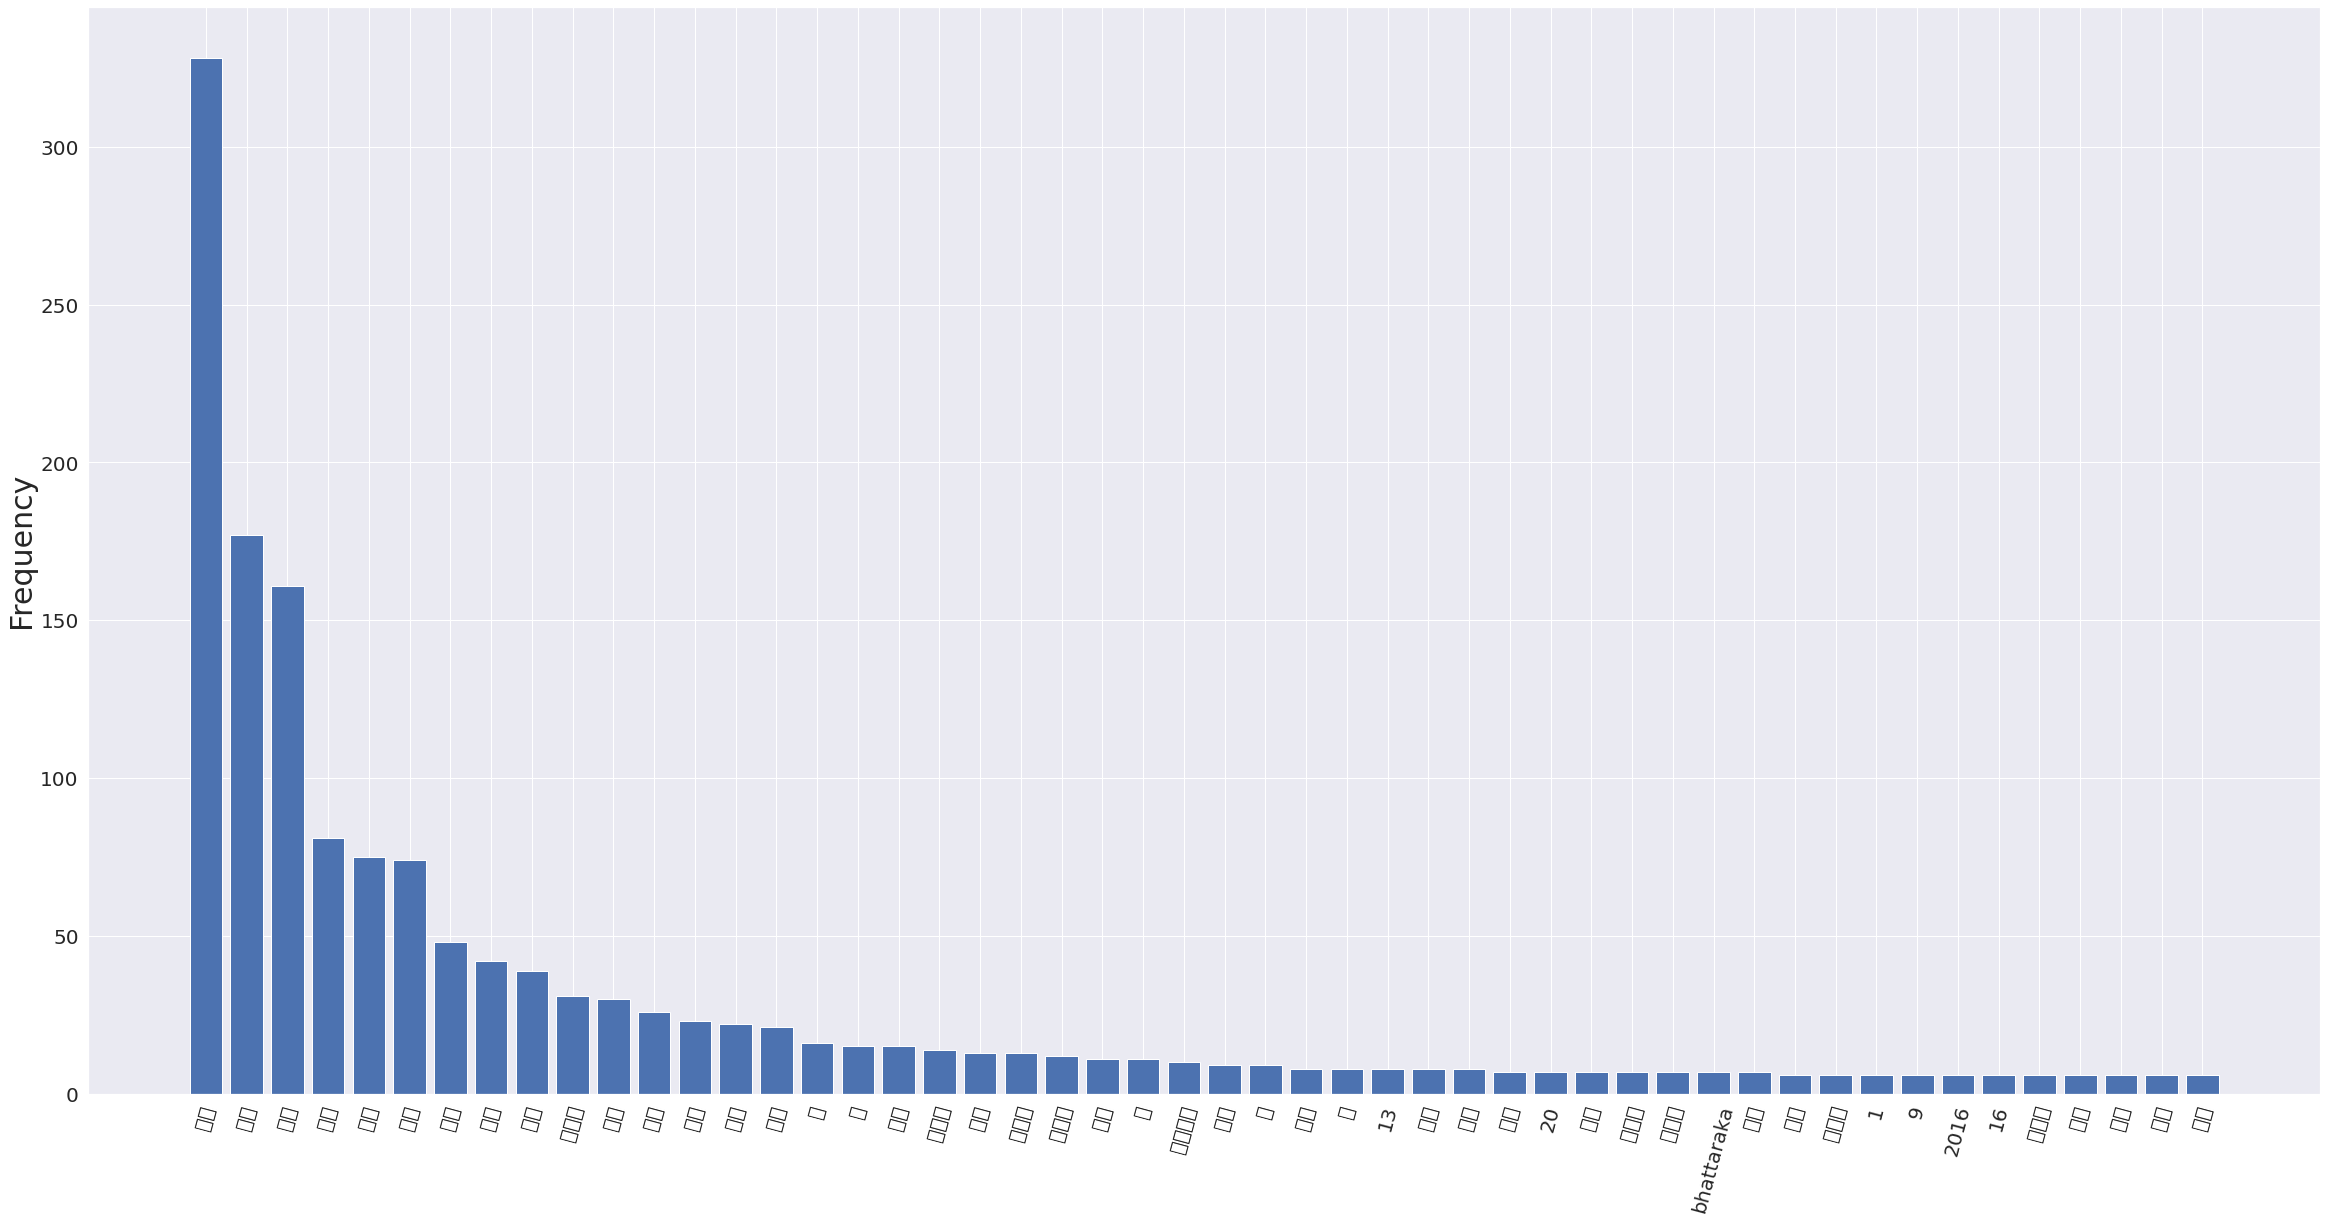

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(words[:50], frequency[:50]) #Plotting the 50 most common unigrams
plt.show()

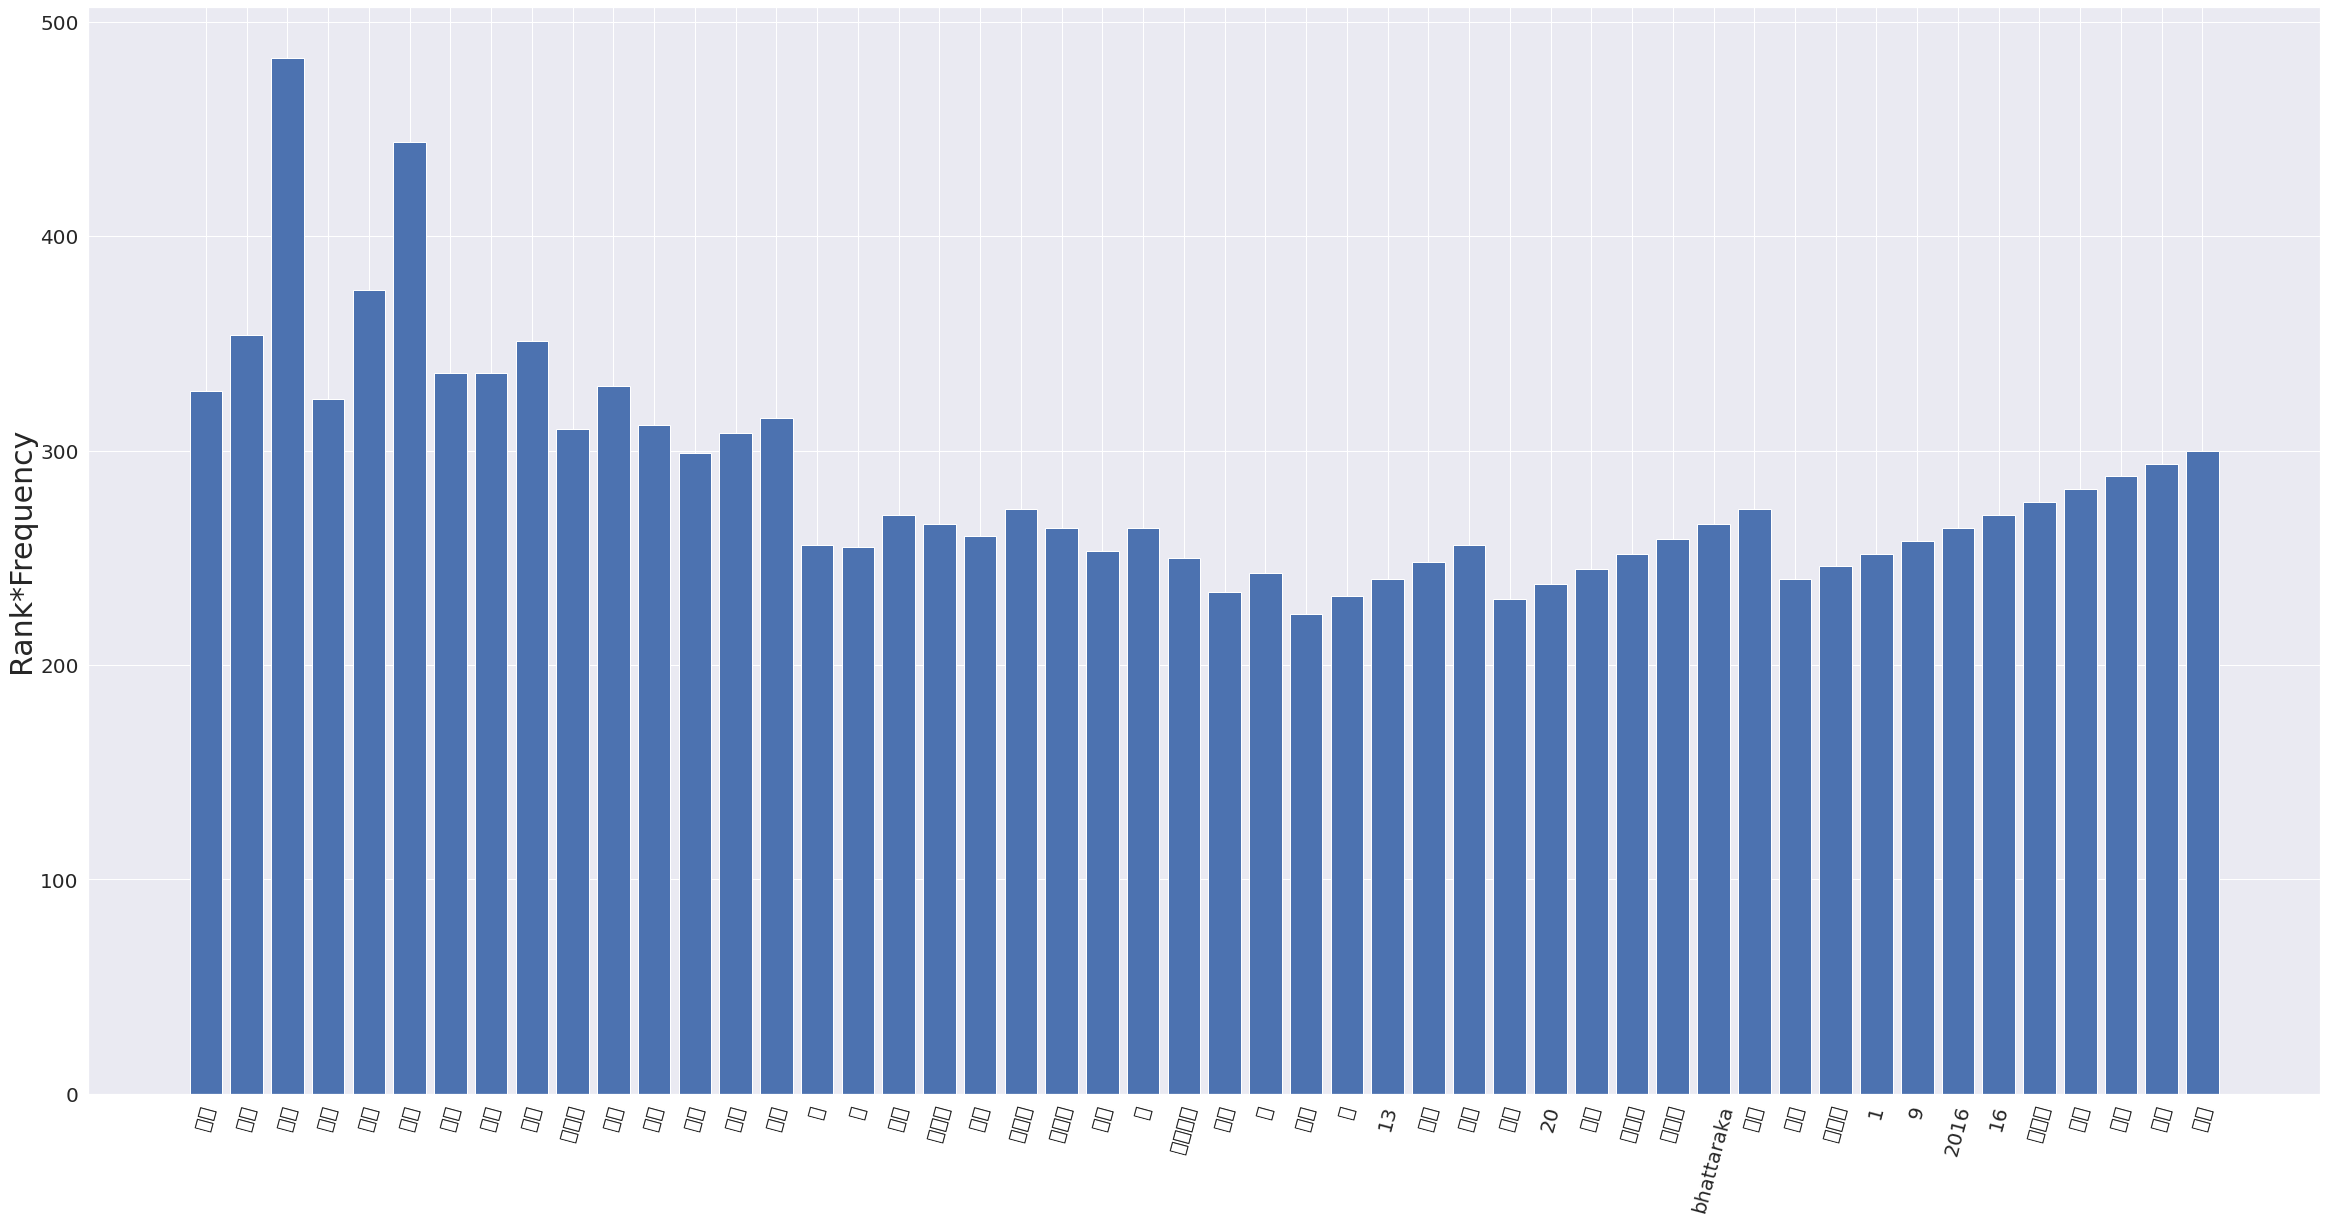

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(words[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 unigrams
plt.show()

###3)Find all possible bigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(hi_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

bigrams = [item for item in ngrams(words_1, 2)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_bigrams = [sorted_bigrams[i][0]+ " " + sorted_bigrams[i][1] for i in range(len(sorted_bigrams))]
print(merged_bigrams)

['और और', 'और पर', 'पर और', 'और एक', 'एक और', 'पर एक', 'पर यह', 'और इस', 'एक एक', 'कर और', 'यह एक', 'पर पर', 'इस और', 'एक इस', 'एक पर', 'पर इस', 'और वह', 'और कई', 'आम पर', 'और कर', 'पर कर', 'यह पर', 'कई और', 'और यह', 'यह और', 'समय और', 'कर कर', 'इस एक', 'तक एक', 'एक यह', 'और इन', 'गए और', 'इस पर', 'एक वह', 'वह एक', 'तक जब', '1 9', 'जब तक', 'तक और', 'यह इस', 'कर पर', 'उन और', 'इस कई', 'वह और', 'एक तरह', 'गई और', 'एक आम', 'कई पर', 'तरह और', 'यह यह', 'और आम', 'उस पर', 'जब कर', 'एक कर', 'उस समय', 'इस कर', 'अलग अलग', 'इन पर', 'और उन', 'सईद और', 'वह यह', 'यह वह', 'अरब और', 'वध पर', 'और चयन', 'पर गई', 'ओर और', 'एक अलग', 'और जब', 'एक जब', 'तक यह', 'समय तक', 'पर गए', 'गए कई', 'कर यह', 'पर समय', 'व और', 'समय पर', 'पर कई', 'और तक', 'पद पर', 'पर जब', 'तब तक', 'इस इन', 'न और', 'तक कर', 'और आजकल', 'जब पर', 'اللہ علیہ', 'علیہ و', 'و آلہ', 'آلہ و', 'و سلم', 'इस इस', 'जगह पर', 'उप और', 'balatkara गण', 'bhattaraka पर', 'इस आम', 'कम और', 'पर इन', 'एक इन', 'इन इस', '13 मई', 'मई 1969', 'आम 2019', 'दशक तक',

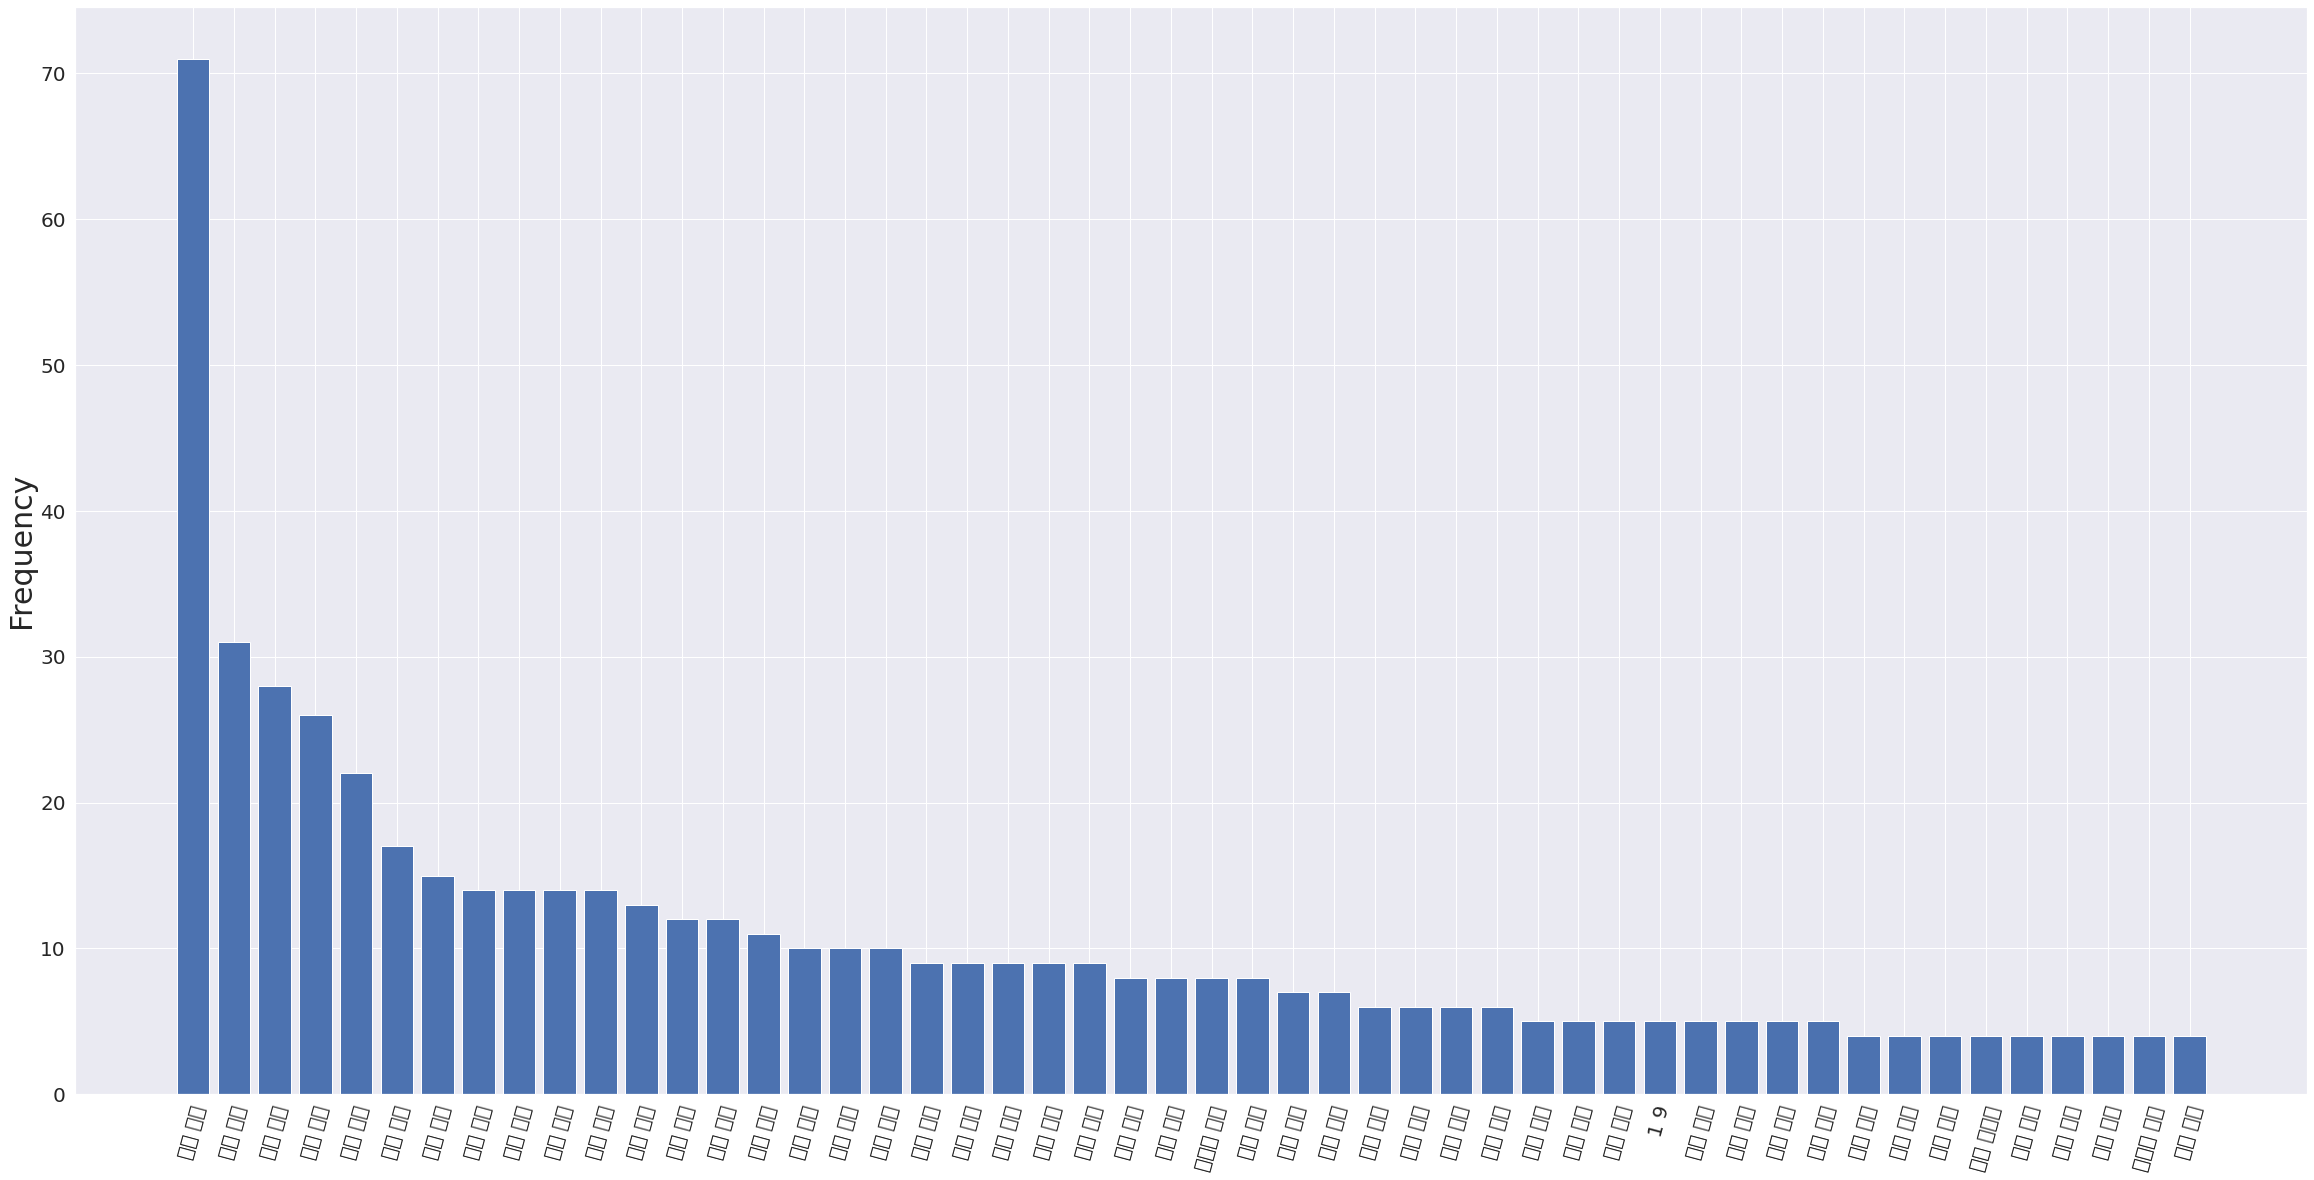

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(merged_bigrams[:50], frequency[:50]) #plotting the 50 bigrams
plt.show()

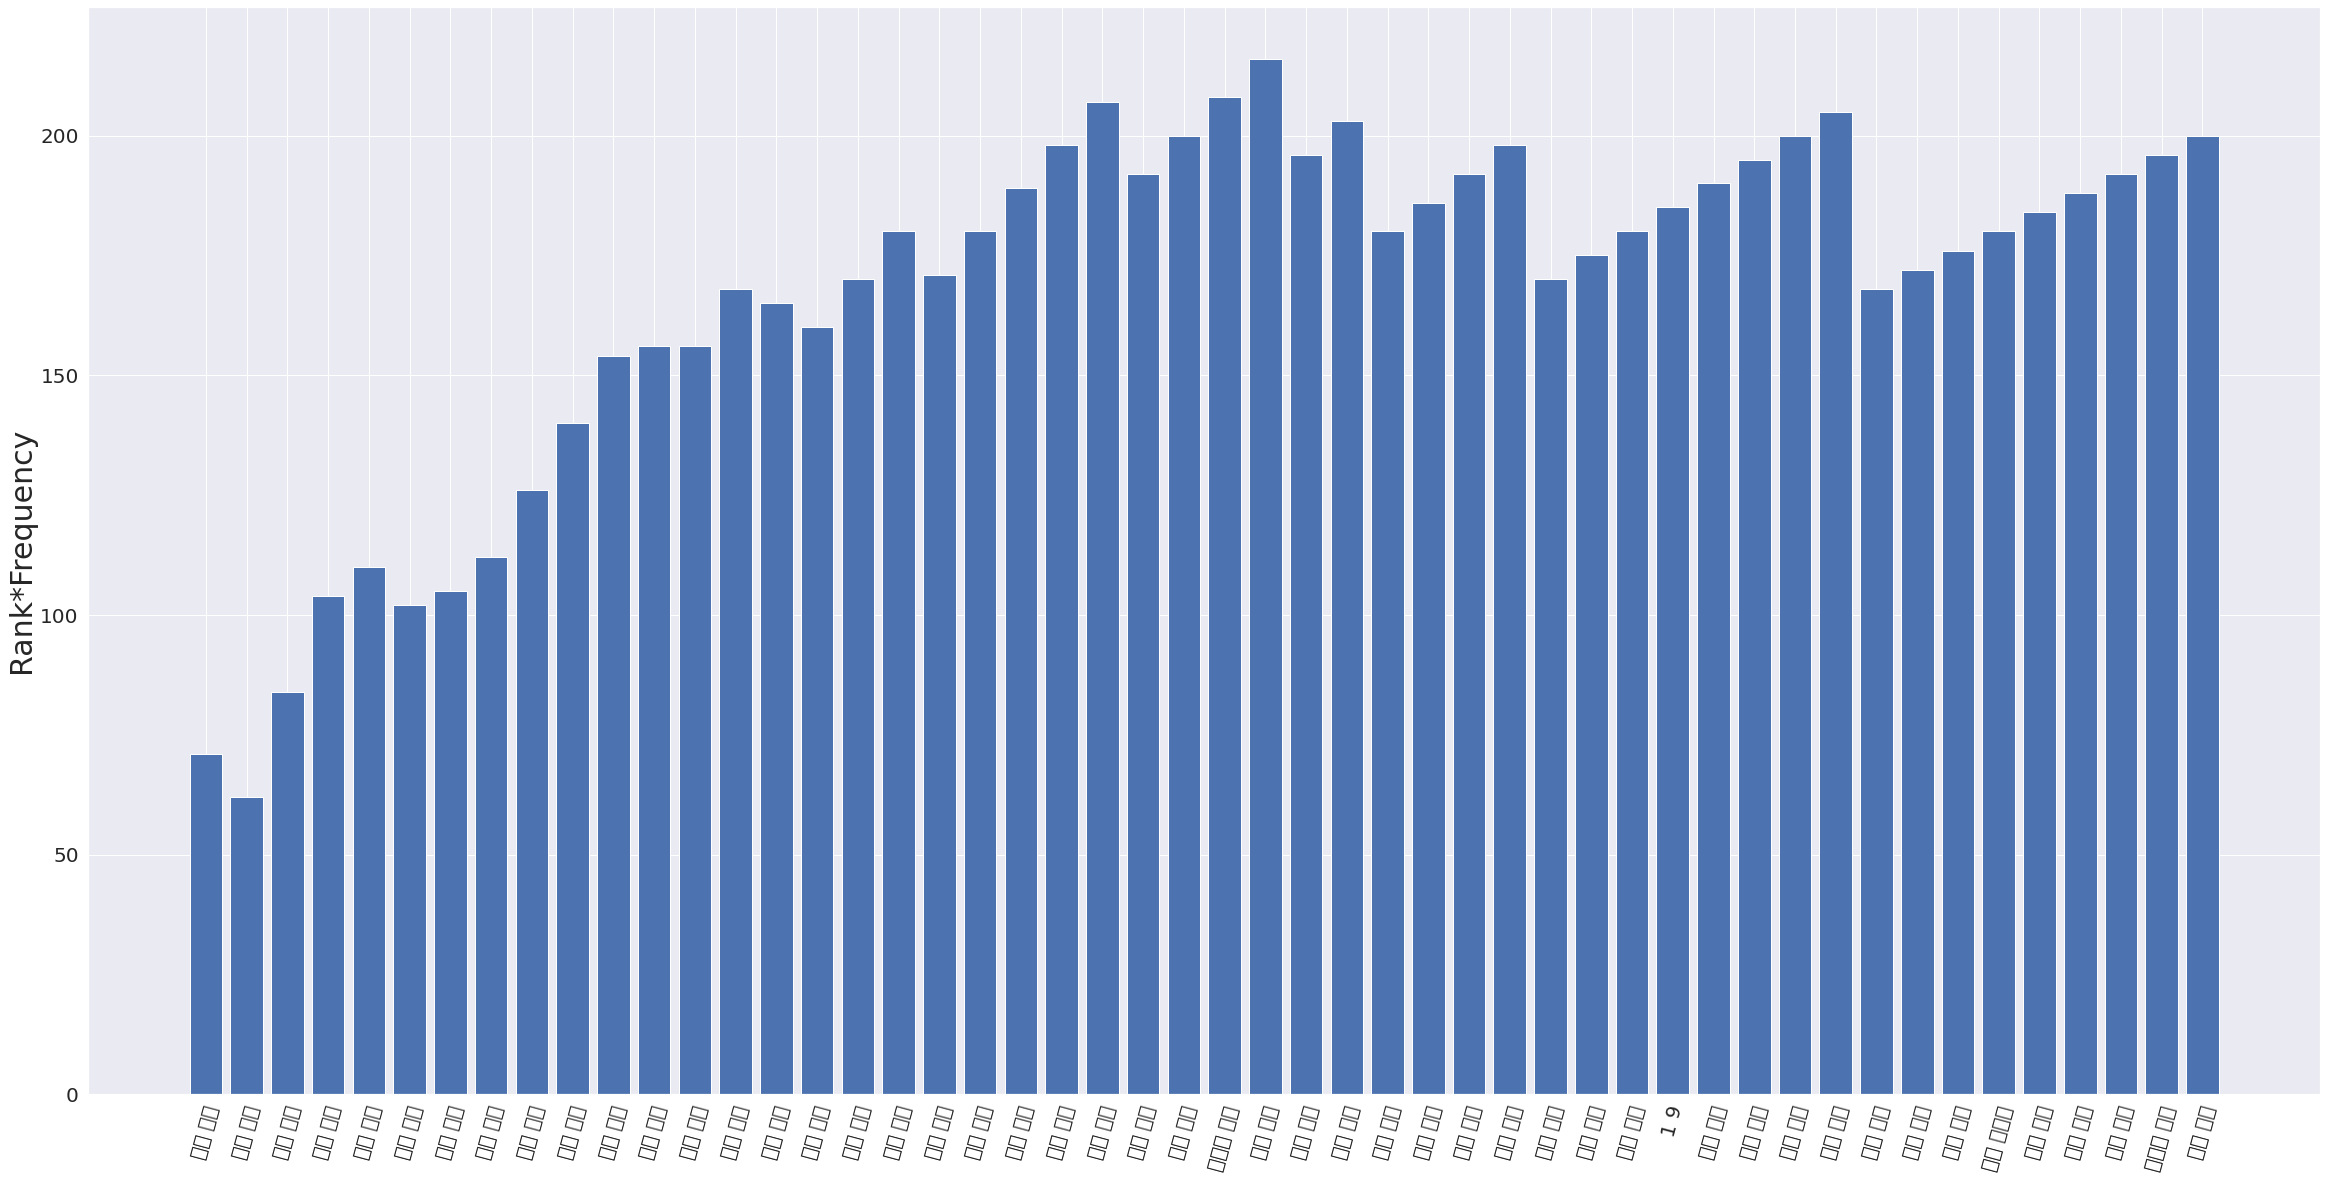

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(merged_bigrams[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 bigrams
plt.show()

###4)Find all possible trigrams, their frequencies and plot the frequency distribution 

In [ ]:
from nltk.util import ngrams
tokens = word_tokenize(hi_wiki.lower()) #Converting to lower case before tokenization
words_1= [word for word in tokens if word.isalnum()] #retaining only alphanumeric characters

trigrams = [item for item in ngrams(words_1, 3)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_trigrams = [sorted_trigrams[i][0]+ " " + sorted_trigrams[i][1] + " " + sorted_trigrams[i][2] for i in range(len(sorted_trigrams))]
print(merged_trigrams[:50])

['और और और', 'और पर और', 'पर और और', 'पर और पर', 'एक और एक', 'और एक और', 'आम पर एक', 'और और पर', 'और पर पर', 'कई और और', 'और और एक', 'और एक एक', 'यह एक इस', 'पर यह एक', 'और उन और', 'और और इस', 'और वह एक', 'और कई पर', 'कर और एक', 'पर इस और', 'और पर एक', 'और पर यह', 'और एक इस', 'इस एक और', 'पर एक एक', 'तक जब तक', 'एक यह एक', 'यह एक पर', 'एक कर और', 'اللہ علیہ و', 'علیہ و آلہ', 'و آلہ و', 'آلہ و سلم', 'और वह और', 'और इन पर', 'पर इस आम', 'इस आम पर', 'आम पर और', 'यह और पर', 'उन और और', '13 मई 1969', 'और इन और', 'पर पर और', 'और और यह', 'और और कई', 'कई पर और', 'एक जय जय', 'पर कर एक', 'और और चयन', 'और चयन यह']


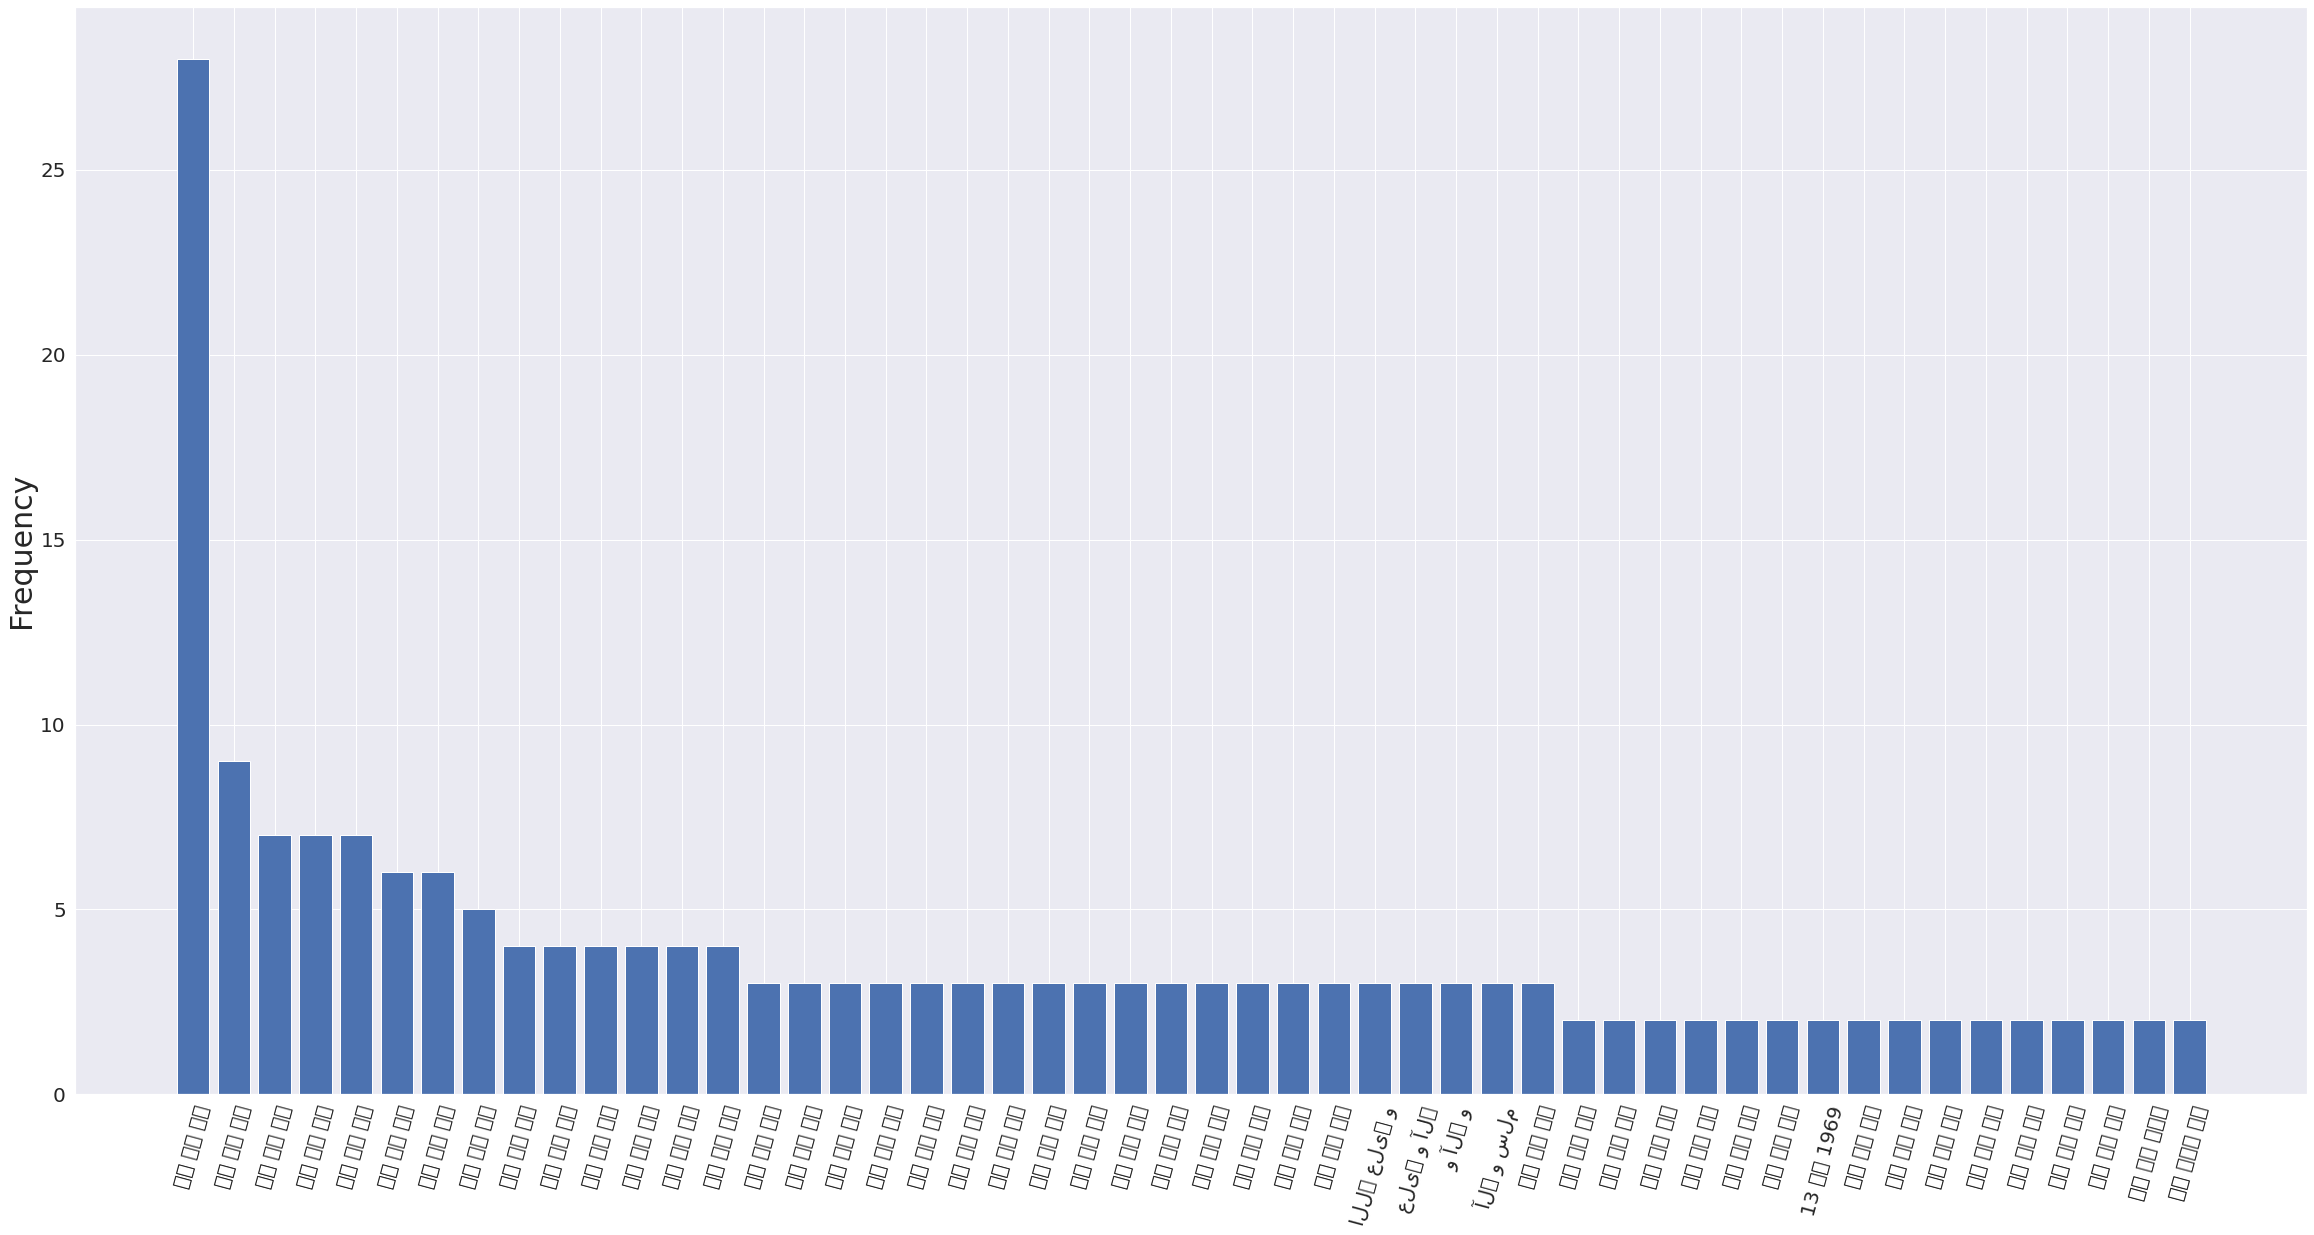

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Frequency", fontsize=30)
plt.bar(merged_trigrams[:50], frequency[:50]) #Plotting the 50 most common trigrams
plt.show()

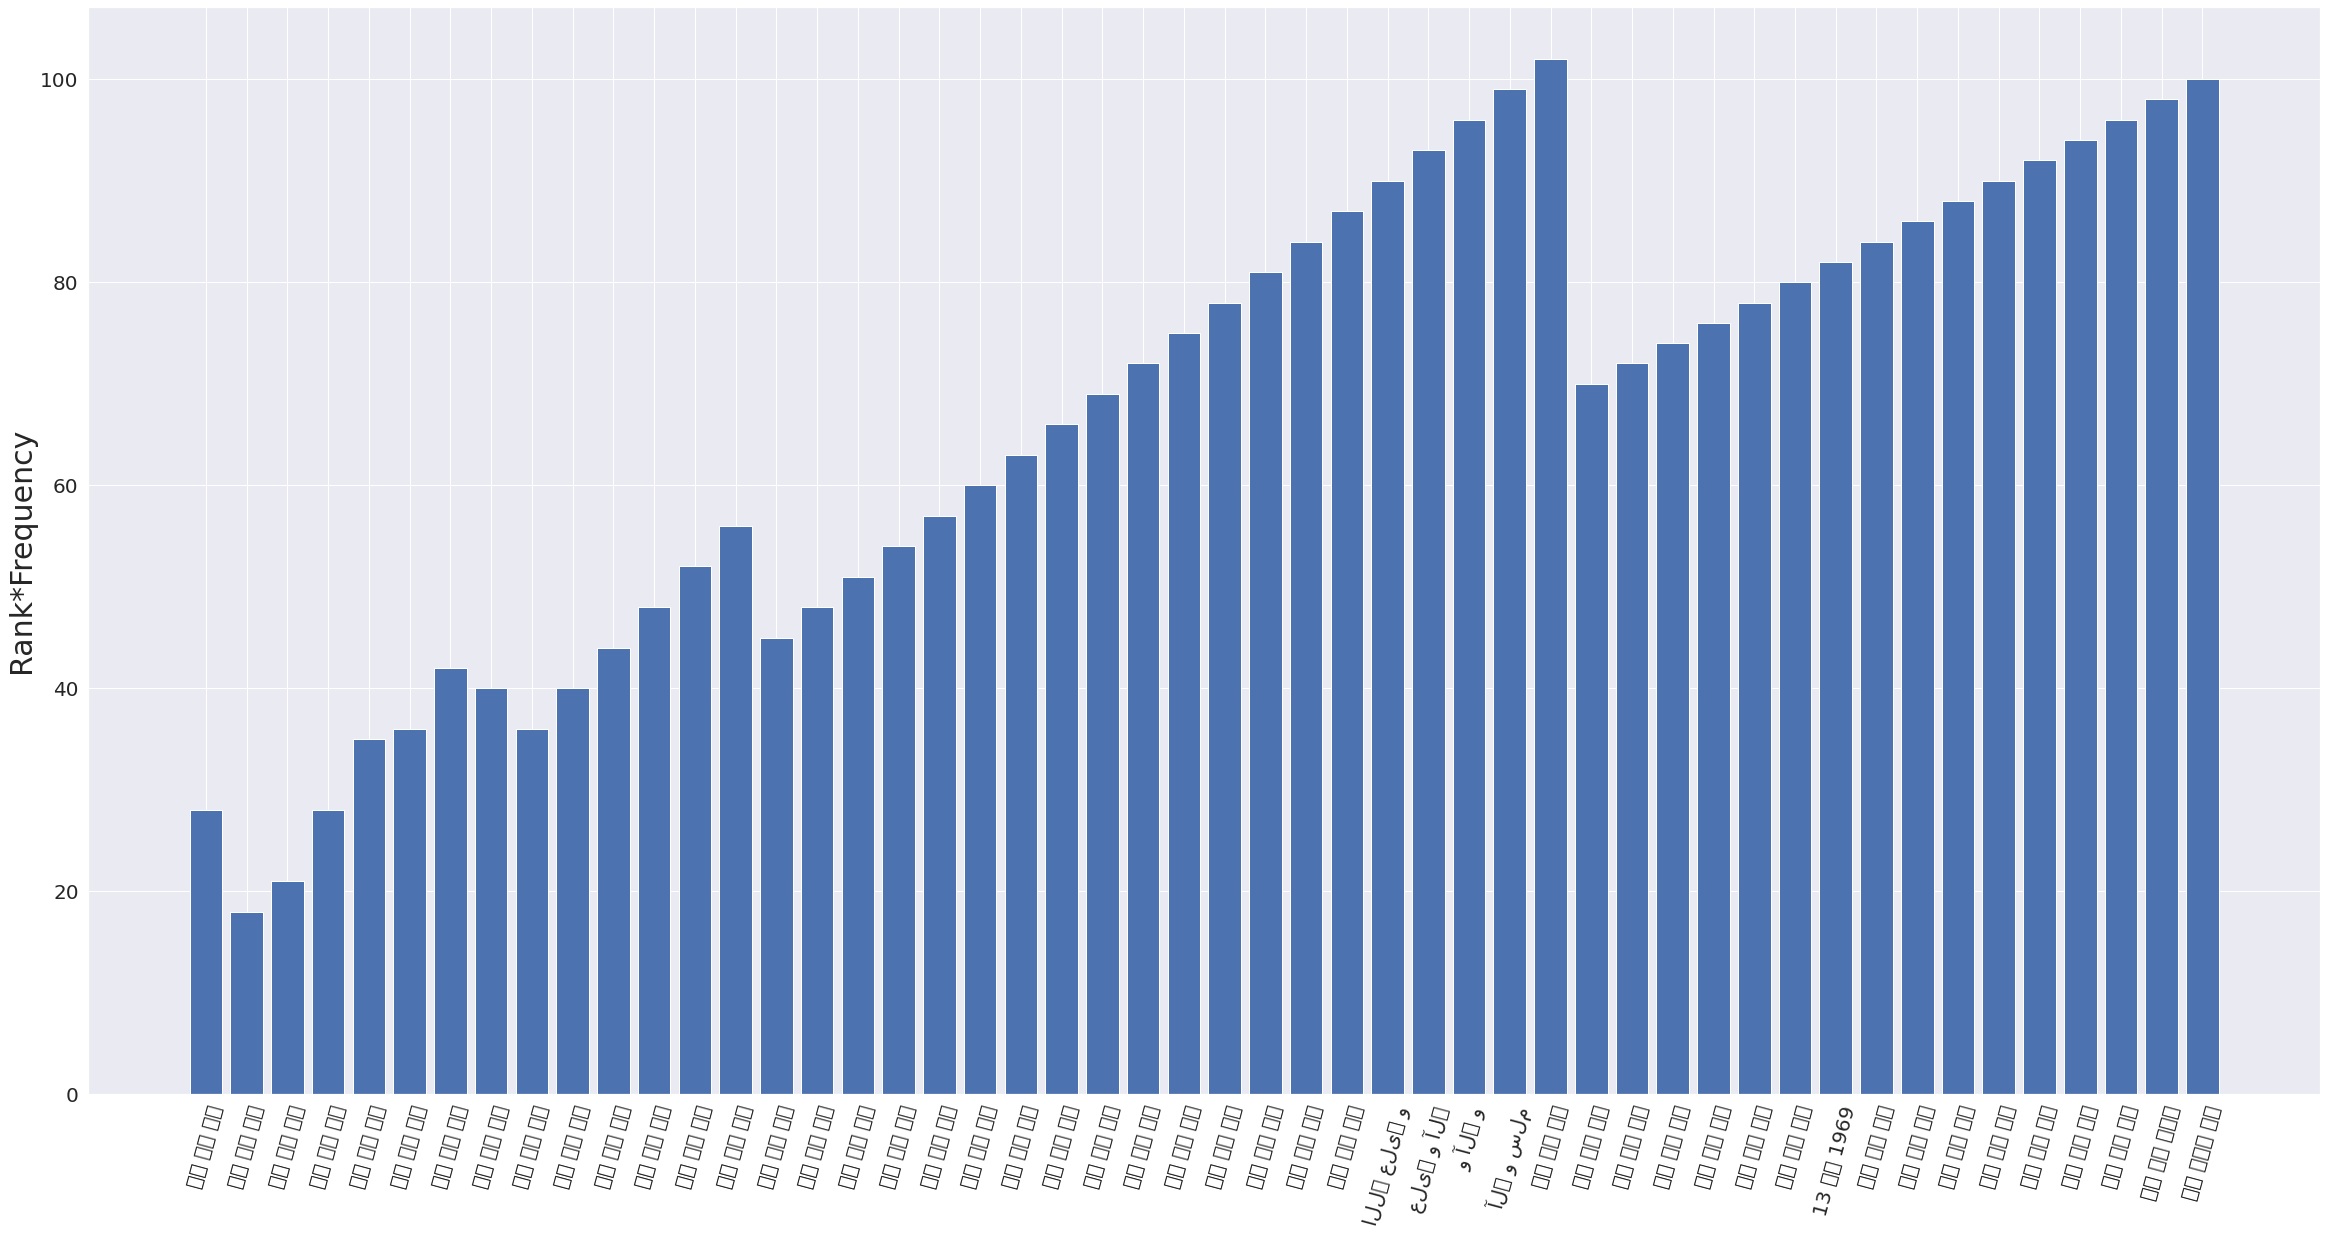

In [ ]:
#Zipf's law
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.xticks(fontsize=20, rotation=75)
plt.yticks(fontsize=20)
plt.ylabel("Rank*Frequency", fontsize=30)
plt.bar(merged_trigrams[:50], np.array(range(1,51))*np.array(frequency[:50])) #plotting the 50 trigrams
plt.show()

##Q1.3.2)

###1) How many (most frequent) uni-grams are required for 90% coverage of the selected corpus?


In [ ]:
#Run the cells of Q2 under Q1.3.1 before running this cell
from collections import Counter 
frequency_dict = dict(Counter(words_1).most_common()) #frequency in order of most to least common

words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

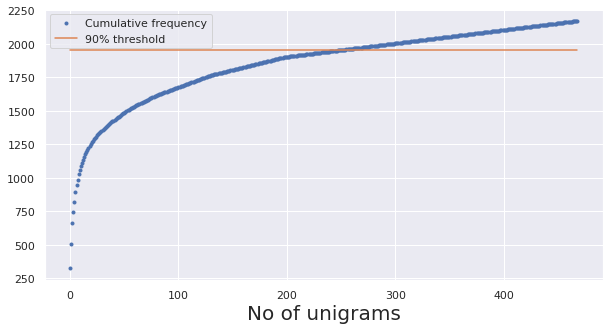

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.9*sum(frequency)]*len(frequency), label="90% threshold")
plt.xlabel("No of unigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.9*sum(frequency):
    print(i+1, "unigrams cover 90% of the entire corpus.")
    break

252 unigrams cover 90% of the entire corpus.


###2) How many (most frequent) bi-grams are required for 80% coverage of the selected corpus?

In [ ]:
#Run the cells of Q3 under Q1.3.1 before running this cell
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

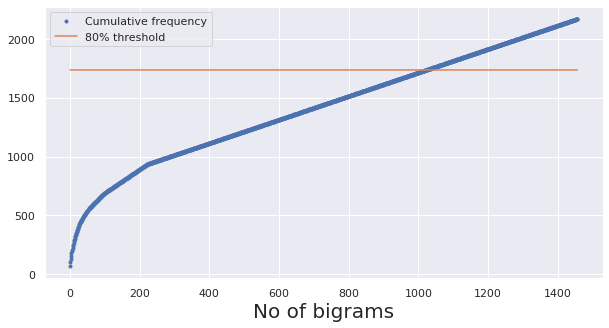

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.8*sum(frequency)]*len(frequency), label="80% threshold")
plt.xlabel("No of bigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.8*sum(frequency):
    print(i+1, "bigrams cover 80% of the entire corpus.")
    break

1024 bigrams cover 80% of the entire corpus.


###3) How many (most frequent) tri-grams are required for 70% coverage of the selected corpus?

In [ ]:
#Run the cells of Q4 under Q1.3.1 before running this cell
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

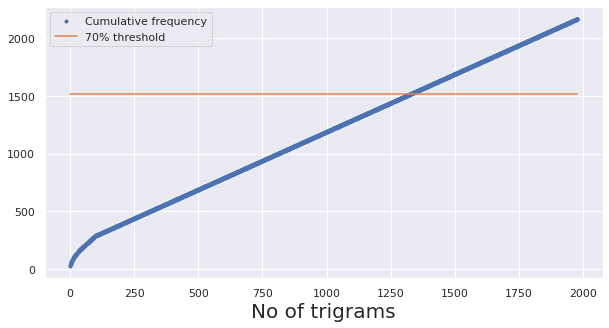

In [ ]:
np.cumsum(frequency)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(np.cumsum(frequency), ".", label="Cumulative frequency")
plt.plot([0.7*sum(frequency)]*len(frequency), label="70% threshold")
plt.xlabel("No of trigrams", fontsize=20)
plt.legend()
plt.show()

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.7*sum(frequency):
    print(i+1, "trigrams cover 70% of the entire corpus.")
    break

1329 trigrams cover 70% of the entire corpus.


##Q1.3.3 Heuristics

In [ ]:
#Sentence segmentation
sentences = []
previous = 0
heu_hi_wiki = hi_wiki.replace("\n", "") #Removing newline characters
for i in range(len(heu_hi_wiki)):
  #if it is the end of the corpus then its a sentence
  if i==len(heu_hi_wiki)-1: 
    sentences.append(heu_hi_wiki[previous:i+1])
    previous = i+1
  #Full stops indicate towards an end of sentence #Checking whitespace after fullstop to eliminate decimal point
  elif heu_hi_wiki[i]=="." and heu_hi_wiki[i+1] == " ": 
    #Common cases for a full stop not being an end of sentence
    if heu_hi_wiki[i-2:i]=="Dr" or heu_hi_wiki[i-2:i]=="Mr" or heu_hi_wiki[i-3:i]=="Mrs" or heu_hi_wiki[i-2:i]=="Ms" or heu_hi_wiki[i-2:i]=="Jr" or heu_hi_wiki[i-1].isupper():
      pass
    else:  
      sentences.append(heu_hi_wiki[previous:i+1])
      previous = i+1
  #Question mark and exclamation mark also mark end of sentence
  elif heu_hi_wiki[i]=="?" or heu_hi_wiki[i]=="!":
    sentences.append(heu_hi_wiki[previous:i+1])
    previous = i+1

print(sentences)

['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं। यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं। इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है। यह डिग्री प्रोग्राम स्वास्थ्य विषय के

In [ ]:
#Word tokenization
heu_hi_wiki = hi_wiki.replace("\n", "") #Removing newline characters
heu_hi_wiki = heu_hi_wiki.lower() #Converting everything to lower case

heu_tokens = []
previous = 0
for i in range(len(heu_hi_wiki)):
  if heu_hi_wiki[i] == " ":
    string = heu_hi_wiki[previous:i]
    string = string.replace("(", "").replace(")", "").replace('"', "").replace(".", "").replace(",", "")
    heu_tokens.append(string)
    previous = i+1
print(heu_tokens)

['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', 'एमएचए', 'या', 'एमएचए', 'स्नातकोत्तर', 'पोस्ट', 'ग्रेजुएशन', 'की', 'एक', 'पेशेवर', 'डिग्री', 'है', 'जो', 'स्वास्थ्य', 'प्रशासन', 'के', 'क्षेत्र', 'में', 'दी', 'जाती', 'हैं।', 'यह', 'उन', 'छात्रों', 'को', 'प्रदान', 'की', 'जाती', 'हैं', 'जिन्होंने', 'स्वास्थ्य', 'प्रशासन', 'अस्पताल', 'प्रबंधन', 'एवं', 'अन्य', 'स्वास्थ्य', 'सेवा', 'संगठनों', 'के', 'क्षेत्र', 'में', 'जरूरी', 'ज्ञान', 'और', 'दक्षता', 'हासिल', 'की', 'हैं।', 'इन', 'पाठ्यक्रमो', 'में', 'परिस्थितियों', 'के', 'अनुसार', 'इनके', 'सरंचना', 'में', 'अंतर', 'हो', 'सकता', 'हैं', 'हालांकि', 'व्यवसायी-शिक्षक', 'मॉडल', 'कार्यक्रम', 'आमतौर', 'पर', 'चिकित्सा', 'स्वास्थ्य', 'व्यवसायों', 'या', 'संबद्ध', 'स्वास्थ्य', 'के', 'कॉलेजों', 'में', 'पाए', 'जाते', 'हैं', 'कक्षा-आधारित', 'कार्यक्रम', 'व्यवसाय', 'या', 'सार्वजनिक', 'स्वास्थ्य', 'के', 'कॉलेजों', 'में', 'होते', 'हैं।इस', 'पाठ्यक्रम', 'के', 'अध्ययन', 'के', 'दौरान', 'आम', 'तौर', 'पर', 'विद्यार्थि

###1)How many (most frequent) uni-grams are required for 90% coverage of the selected corpus?


In [ ]:
from nltk.util import ngrams

unigrams = [item for item in ngrams(heu_tokens, 1)]

In [ ]:
from collections import Counter 
frequency_dict = dict(Counter(heu_tokens).most_common()) #frequency in order of most to least common

words = np.array(list(frequency_dict.keys()))
frequency = np.array(list(frequency_dict.values()))

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.9*sum(frequency):
    print(i+1, "unigrams cover 90% of the entire corpus.")
    break

3159 unigrams cover 90% of the entire corpus.


###2)How many (most frequent) bi-grams are required for 80% coverage of the selected corpus?


In [ ]:
from nltk.util import ngrams

bigrams = [item for item in ngrams(heu_tokens, 2)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(bigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_bigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_bigrams = [sorted_bigrams[i][0]+ " " + sorted_bigrams[i][1] for i in range(len(sorted_bigrams))]

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.8*sum(frequency):
    print(i+1, "bigrams cover 80% of the entire corpus.")
    break

10539 bigrams cover 80% of the entire corpus.


###3)How many (most frequent) tri-grams are required for 70% coverage of the selected corpus?


In [ ]:
from nltk.util import ngrams

trigrams = [item for item in ngrams(heu_tokens, 3)]

In [ ]:
from collections import Counter
frequency_dict = dict(Counter(trigrams).most_common()) #frequency in order of most to least common

In [ ]:
sorted_trigrams = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

In [ ]:
merged_trigrams = [sorted_trigrams[i][0]+ " " + sorted_trigrams[i][1] + " " + sorted_trigrams[i][2] for i in range(len(sorted_trigrams))]

In [ ]:
for i in range(len(frequency)):
  if np.cumsum(frequency)[i]>0.7*sum(frequency):
    print(i+1, "trigrams cover 70% of the entire corpus.")
    break

11826 trigrams cover 70% of the entire corpus.


##1.3.4 Morphological Parsing

###1. Perform a morphological analysis of 5 words randomly sampled from 100 frequent words and 5 words randomly sampled from 100 least frequent words.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
# print("Pipeline:", nlp.pipe_names)

In [ ]:
most_frequent = dict(Counter(words_1).most_common(100))
words = list(most_frequent.keys())
frequency = list(most_frequent.values())

In [ ]:
from random import sample
most_frequent_sample = sample(words, 5)
print(most_frequent_sample)

['इस', 'पद', 'हजरत', 'कई', 'लगभग']


In [ ]:
for word in most_frequent_sample:
  word = nlp(word)
  print("Word:", word[0])
  print("Lemmatized form:", word[0].lemma_)
  print("Course grained part of speech:", word[0].pos_)
  print("Fine grained part of speech:", word[0].tag_)
  print("-"*5)

Word: इस
Lemmatized form: इस
Course grained part of speech: ADP
Fine grained part of speech: IN
-----
Word: पद
Lemmatized form: पद
Course grained part of speech: X
Fine grained part of speech: ADD
-----
Word: हजरत
Lemmatized form: हजरत
Course grained part of speech: NOUN
Fine grained part of speech: NNS
-----
Word: कई
Lemmatized form: कई
Course grained part of speech: PROPN
Fine grained part of speech: NNP
-----
Word: लगभग
Lemmatized form: लगभग
Course grained part of speech: ADJ
Fine grained part of speech: JJ
-----


In [ ]:
least_frequent = dict(Counter(words_1).most_common()[:-101:-1])
words = list(least_frequent.keys())
frequency = list(least_frequent.values())

In [ ]:
from random import sample
least_frequent_sample = sample(words, 5)
print(least_frequent_sample)

['915', '1228', '124', 'fm94', '86']


In [ ]:
for word in least_frequent_sample:
  word = nlp(word)
  print("Word:", word[0])
  print("Lemmatized form:", word[0].lemma_)
  print("Course grained part of speech:", word[0].pos_)
  print("Fine grained part of speech:", word[0].tag_)
  print("-"*5)

Word: 915
Lemmatized form: 915
Course grained part of speech: NUM
Fine grained part of speech: CD
-----
Word: 1228
Lemmatized form: 1228
Course grained part of speech: NUM
Fine grained part of speech: CD
-----
Word: 124
Lemmatized form: 124
Course grained part of speech: NUM
Fine grained part of speech: CD
-----
Word: fm94
Lemmatized form: fm94
Course grained part of speech: PROPN
Fine grained part of speech: NNP
-----
Word: 86
Lemmatized form: 86
Course grained part of speech: NUM
Fine grained part of speech: CD
-----


##1.3.5 Sub-word tokenization

###For 50 least frequent words

In [ ]:
import string
alphabet = list(string.ascii_uppercase) #list of Capital letters to replace the common byte pairs
alphabet_count = 0 # a counter to for indexing the alphabet list

least_frequent = dict(Counter(words_1).most_common()[:-51:-1])
words = list(least_frequent.keys())
frequency = list(least_frequent.values())
character_vocab = [] # this list will contain the characters seen in the words

for word in words: #iterate through the words to build the character vocabulary
  word = word+">" # > marks the end of the word 

  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

iter = 3
for k in range(iter):
  bp_dict = {} #this will contain the byte pairs as keys and the no. of occurences as values
  print("The vocabulary of characters:" , character_vocab)
  words = list(least_frequent.keys())

  for word in words: #this loop builds the byte pair dictionary
    if len(word)>=2: #For a byte pair there should be atleast two characters in the word
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1*least_frequent[word] #for every occurence, we need to add the number times the word occurs in the corpus
        else:
          bp_dict[word[i] + word[i+1]] = 1*least_frequent[word]
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = [] #this will contain the bp which occurs most often

  for key in bp_dict.keys(): #this loop is to build the most_frequent_bp array
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1: #byte pair should occur atleast twice for it to be replaced by a token
    for bp in most_frequent_bp: #this loop will add the most frequent byte pairs to the character vocabulary 
      character_vocab.append(bp)
  
    for bp in most_frequent_bp: #this loop replaces all the byte pairs in the words with the tokens  
      for key in least_frequent.keys():
        if bp in key: #if the key/word has the byte pair then replace it
          dummy = key.replace(bp, alphabet[alphabet_count])
          least_frequent[dummy] = least_frequent.pop(key) #create a new key in the dict with the new word and remove the old key
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['त', '>', '1', '9', '6', '7', '3', '4', '8', 'ब', 'ह', 'स', 'ऐ', 'च', 'र', 'ण', '5', '0', '2', 'य', 'i', 'v', 'भ', 'ज', 'न', 'क', 'उ', 'द', 'ठ', 'अ', 'व', 'c', 'h', 't', 'o', 'r', 'j', 'y', 'p', 'a', 's', 'd', 'b', 'k', 'm', 'n', 'e', 'u', 'l', 'g', 'w']
The byte-pair counts are {'19': 11, '96': 1, '67': 1, '97': 2, '73': 1, '17': 2, '76': 1, '94': 2, '48': 2, 'बह': 1, 'हस': 1, '64': 1, 'ऐच': 1, 'चर': 1, 'रण': 1, '45': 1, '93': 2, '30': 1, '31': 1, '92': 2, '28': 2, '27': 2, 'तय': 1, '91': 1, 'iv': 1, '41': 1, '15': 1, '51': 1, '10': 2, '14': 1, '49': 1, '98': 1, 'भज': 1, 'जन': 1, 'रह': 1, 'हक': 1, 'कर': 2, 'उद': 1, 'दय': 1, 'उठ': 1, 'ठक': 1, 'बच': 1, '12': 4, '24': 1, 'अव': 1, 'वस': 1, 'सर': 1, 'ch': 3, 'hi': 3, 'it': 2, 'tt': 6, 'to': 2, 'or': 2, 'jy': 1, 'yo': 1, 'ot': 1, 'ti': 2, 'ip': 1, 'pr': 2, 'ra': 7, 'as': 3, 'sa': 2, 'ad': 3, 'bh': 3, 'ha': 5, 'at': 5, 'ta': 7, 'ar': 6, 'ak': 3, 'ka': 2, 'pa': 2, 'dm': 1, 'ma': 3, 'an': 5, 'na': 2, 'nd': 4, 'di

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['त', '17', 'बहस', '64', 'ऐचरण', 'तय', 'iv', '41', '1510', '1498', 'भजन', 'रहकर', 'उदय', 'उठकर', 'बच', '124', 'अवसर', 'chittor', 'padmanandi', 'chittore', 'ii', '1271', '1228', '1218', 'balligame', '1048', '8', 'A67', 'A73', 'A', 'A76', 'A48', 'A45', 'A30', 'A31', 'A28', 'A27', 'A17', 'jyotipBsad', 'pBtishthas', 'devendBkeerthi', 'chandaByarus', 'mahamandaleshwaB', 'sCmbh', 'utCm', 'patCvali', 'sanCr', 'jinadatC', 'bhatCBkas', 'bhaCBka']


### For 50 most frequent words

In [ ]:
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0
most_frequent = dict(Counter(words_1).most_common(50))
words = list(most_frequent.keys())
frequency = list(most_frequent.values())
character_vocab = []
for word in words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
  words = list(most_frequent.keys())
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1*most_frequent[word]
        else:
          bp_dict[word[i] + word[i+1]] = 1*most_frequent[word]
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for key in most_frequent.keys():
        if bp in key:
          dummy = key.replace(bp, alphabet[alphabet_count])
          
          most_frequent[dummy] = most_frequent.pop(key)
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['औ', 'र', '>', 'प', 'ए', 'क', 'इ', 'स', 'य', 'ह', 'त', 'ई', 'व', 'म', 'ग', 'ज', 'ब', 'आ', 'न', 'उ', 'ओ', 'श', 'अ', 'ल', 'भ', 'ऑ', 'फ', 'द', '1', '3', '2', '0', 'ठ', 'b', 'h', 'a', 't', 'r', 'k', 'च', '9', '6']
The byte-pair counts are {'और': 328, 'पर': 177, 'एक': 161, 'इस': 81, 'यह': 75, 'कर': 74, 'तक': 48, 'कई': 42, 'वह': 39, 'सम': 31, 'मय': 38, 'गए': 30, 'जब': 26, 'आम': 23, 'गई': 22, 'इन': 21, 'उस': 15, 'तर': 14, 'रह': 14, 'ओर': 13, 'शह': 13, 'हर': 20, 'अल': 12, 'लग': 22, 'तब': 11, 'गभ': 10, 'भग': 10, 'ऑफ': 9, 'उन': 8, '13': 8, 'आज': 8, 'अब': 8, 'पद': 7, '20': 13, 'अग': 7, 'गर': 7, 'गठ': 7, 'ठन': 7, 'bh': 7, 'ha': 7, 'at': 7, 'tt': 7, 'ta': 7, 'ar': 7, 'ra': 7, 'ak': 7, 'ka': 7, 'कम': 6, 'चय': 6, 'यन': 6, '01': 6, '16': 12, 'जग': 6, 'गह': 6, 'नए': 6, 'बन': 6, 'आप': 6, 'सब': 6}
token to be replaced next: और with A
----------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['एक', 'इस', 'यह', 'कर', 'तक', 'कई', 'वह', 'समय', 'गए', 'जब', 'आम', 'गई', 'इन', 'व', 'न', 'उस', 'तरह', 'ओर', 'शहर', 'अलग', 'तब', 'ई', 'लगभग', 'ऑफ', 'आ', 'उन', 'द', '13', 'आज', 'अब', 'पद', '20', 'हर', 'अगर', 'गठन', 'bhattaraka', 'मय', 'कम', 'चयन', '1', '9', '2016', '16', 'जगह', 'नए', 'बन', 'आप', 'सब', 'A', 'B']


###3) Select 10 words that are not in the corpus

In [ ]:
selected_words = ["intelligent", "systems", "interfaces", "natural", "language", "processing", "machine", "learning", "artificial", "reinforcement"]

In [ ]:
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in selected_words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = selected_words.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['i', 'n', 't', 'e', 'l', 'g', '>', 's', 'y', 'm', 'r', 'f', 'a', 'c', 'u', 'p', 'o', 'h']
The byte-pair counts are {'in': 6, 'nt': 4, 'te': 3, 'el': 1, 'll': 1, 'li': 1, 'ig': 1, 'ge': 2, 'en': 2, 'sy': 1, 'ys': 1, 'st': 1, 'em': 2, 'ms': 1, 'er': 1, 'rf': 1, 'fa': 1, 'ac': 2, 'ce': 3, 'es': 2, 'na': 1, 'at': 1, 'tu': 1, 'ur': 1, 'ra': 1, 'al': 2, 'la': 1, 'an': 1, 'ng': 3, 'gu': 1, 'ua': 1, 'ag': 1, 'pr': 1, 'ro': 1, 'oc': 1, 'ss': 1, 'si': 1, 'ma': 1, 'ch': 1, 'hi': 1, 'ne': 1, 'le': 1, 'ea': 1, 'ar': 2, 'rn': 1, 'ni': 1, 'rt': 1, 'ti': 1, 'if': 1, 'fi': 1, 'ic': 1, 'ci': 1, 'ia': 1, 're': 1, 'ei': 1, 'nf': 1, 'fo': 1, 'or': 1, 'rc': 1, 'me': 1}
token to be replaced next: in with A
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['i', 'n', 't', 'e', 'l', 'g', '>', 's', 'y',

###4)Compare BPE tokenization of the 10 words selected during Morphological analysis with their morphemes

In [ ]:
selected_words = most_frequent_sample + least_frequent_sample
morphemes = []
for word in selected_words:
  doc = nlp(word)
  morphemes.append(doc[0].lemma_)



In [ ]:
#orginal words
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in selected_words:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = selected_words.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['इ', 'स', '>', 'प', 'द', 'ह', 'ज', 'र', 'त', 'क', 'ई', 'ल', 'ग', 'भ', '9', '1', '5', '2', '8', '4', 'f', 'm', '6']
The byte-pair counts are {'इस': 1, 'पद': 1, 'हज': 1, 'जर': 1, 'रत': 1, 'कई': 1, 'लग': 1, 'गभ': 1, 'भग': 1, '91': 1, '15': 1, '12': 2, '22': 1, '28': 1, '24': 1, 'fm': 1, 'm9': 1, '94': 1, '86': 1}
token to be replaced next: 12 with A
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['इ', 'स', '>', 'प', 'द', 'ह', 'ज', 'र', 'त', 'क', 'ई', 'ल', 'ग', 'भ', '9', '1', '5', '2', '8', '4', 'f', 'm', '6', '12']
The byte-pair counts are {'इस': 1, 'पद': 1, 'हज': 1, 'जर': 1, 'रत': 1, 'कई': 1, 'लग': 1, 'गभ': 1, 'भग': 1, '91': 1, '15': 1, 'A2': 1, '28': 1, 'A4': 1, 'fm': 1, 'm9': 1, '94': 1, '86': 1}
-------------------------------------------------------------------------------

In [ ]:
print("The tokenized words are:", words)

The tokenized words are: ['इस', 'पद', 'हजरत', 'कई', 'लगभग', '915', 'A28', 'A4', 'fm94', '86']


In [ ]:
#morphemes
import string
alphabet = list(string.ascii_uppercase)
alphabet_count = 0

character_vocab = []
for word in morphemes:
  word = word+">" # > marks the end of the word 
  for i in range(len(word)):
    if word[i] not in character_vocab:
      character_vocab.append(word[i])

words = morphemes.copy()
iter = 3
for k in range(iter):
  bp_dict = {}
  print("The vocabulary of characters:" , character_vocab)
 
  for word in words:
    if len(word)>=2:
      for i in range(len(word)-1):
        if word[i]+word[i+1] in bp_dict.keys():
          bp_dict[word[i]+word[i+1]] += 1
        else:
          bp_dict[word[i] + word[i+1]] = 1
      
  print("The byte-pair counts are", bp_dict)
  max = 0
  most_frequent_bp = []
  for key in bp_dict.keys():
    if bp_dict[key]>max:
      max = bp_dict[key]
      most_frequent_bp = [key]
    elif bp_dict[key]==max:
      most_frequent_bp.append(key)

  if max>1:
    for bp in most_frequent_bp:
      # bp = bp.replace(alphabet[alphabet_count-1], character_vocab[-1])
      # print(alphabet[alphabet_count-1])
      character_vocab.append(bp)
  
    for bp in most_frequent_bp:
      for i in range(len(words)):
        if bp in words[i]:
          
          dummy = words[i].replace(bp, alphabet[alphabet_count])
          words[i] = dummy 
      alphabet_count += 1
      print("token to be replaced next:", bp, "with", alphabet[alphabet_count-1])
  print("-"*200)

The vocabulary of characters: ['इ', 'स', '>', 'प', 'द', 'ह', 'ज', 'र', 'त', 'क', 'ई', 'ल', 'ग', 'भ', '9', '1', '5', '2', '8', '4', 'f', 'm', '6']
The byte-pair counts are {'इस': 1, 'पद': 1, 'हज': 1, 'जर': 1, 'रत': 1, 'कई': 1, 'लग': 1, 'गभ': 1, 'भग': 1, '91': 1, '15': 1, '12': 2, '22': 1, '28': 1, '24': 1, 'fm': 1, 'm9': 1, '94': 1, '86': 1}
token to be replaced next: 12 with A
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The vocabulary of characters: ['इ', 'स', '>', 'प', 'द', 'ह', 'ज', 'र', 'त', 'क', 'ई', 'ल', 'ग', 'भ', '9', '1', '5', '2', '8', '4', 'f', 'm', '6', '12']
The byte-pair counts are {'इस': 1, 'पद': 1, 'हज': 1, 'जर': 1, 'रत': 1, 'कई': 1, 'लग': 1, 'गभ': 1, 'भग': 1, '91': 1, '15': 1, 'A2': 1, '28': 1, 'A4': 1, 'fm': 1, 'm9': 1, '94': 1, '86': 1}
-------------------------------------------------------------------------------

In [ ]:
print("The tokenized words", words)

The tokenized words ['इस', 'पद', 'हजरत', 'कई', 'लगभग', '915', 'A28', 'A4', 'fm94', '86']
